# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th and come to class . Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [2]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  9114k      0 --:--:--  0:01:38 --:--:-- 6716k  0:00:06 --:--:-- 10.1M0     0   9.9M      0 --:--:--  0:00:32 --:--:-- 13.0M0  10.0M      0 --:--:--  0:00:34 --:--:-- 12.8M     0 --:--:--  0:00:50 --:--:-- 10.6M  0     0   9.8M      0 --:--:--  0:00:54 --:--:-- 11.4M  0  9936k      0 --:--:--  0:01:10 --:--:-- 6884k    0  9599k      0 --:--:--  0:01:20 --:--:-- 6915k  9379k      0 --:--:--  0:01:26 --:--:-- 6547k


In [4]:
!rm SUSY.csv

In [6]:
!gunzip SUSY.csv.gz

In [7]:
ls -lh

total 4703424
-rw-r--r--  1 nghitran  staff   5.8M Mar 13 18:09 Lab.7.pdf
-rw-r--r--  1 nghitran  staff   389K Mar 13 18:49 Lab.7.solution.ipynb
-rw-r--r--  1 nghitran  staff   2.2G Mar 13 18:49 SUSY.csv


The data is provided as a comma separated file.

In [10]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [25]:
!ls -lh

total 5148432
-rw-r--r--@ 1 nghitran  staff   5.8M Mar 13 18:09 Lab.7.pdf
-rw-r--r--  1 nghitran  staff   553K Mar 19 12:52 Lab.7.solution.ipynb
-rw-r--r--  1 nghitran  staff   228M Mar 13 18:49 SUSY-small.csv
-rw-r--r--  1 nghitran  staff   2.2G Mar 13 18:49 SUSY.csv


We see that we have 5 million datapoints.

In [14]:
!wc -l SUSY.csv

 5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [16]:
!head -500000 SUSY.csv > SUSY-small.csv

In [18]:
ls -lh

total 5170280
-rw-r--r--  1 nghitran  staff   5.8M Mar 13 18:09 Lab.7.pdf
-rw-r--r--  1 nghitran  staff   389K Mar 13 18:49 Lab.7.solution.ipynb
-rw-r--r--  1 nghitran  staff   228M Mar 13 18:49 SUSY-small.csv
-rw-r--r--  1 nghitran  staff   2.2G Mar 13 18:49 SUSY.csv


In [20]:
! wc -l SUSY-small.csv

  500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [1]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [31]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [31]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [33]:
FeatureNames

['M_Delta_R',
 'cos_theta_r1',
 'R',
 'M_R',
 'MET_rel',
 'axial_MET',
 'M_TR_2',
 'S_R',
 'MT2',
 'dPhi_r_b']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [182]:
filename = "SUSY.csv"
ds = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [36]:
ds

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [183]:
ds_sig=df[ds.signal==1]
ds_bkg=df[ds.signal==0]

/var/folders/04/9rdrv6m92fn8yfkfl9p9xv180000gn/T/ipykernel_37723/2142237965.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds_sig=df[ds.signal==1]
/var/folders/04/9rdrv6m92fn8yfkfl9p9xv180000gn/T/ipykernel_37723/2142237965.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ds_bkg=df[ds.signal==0]


The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


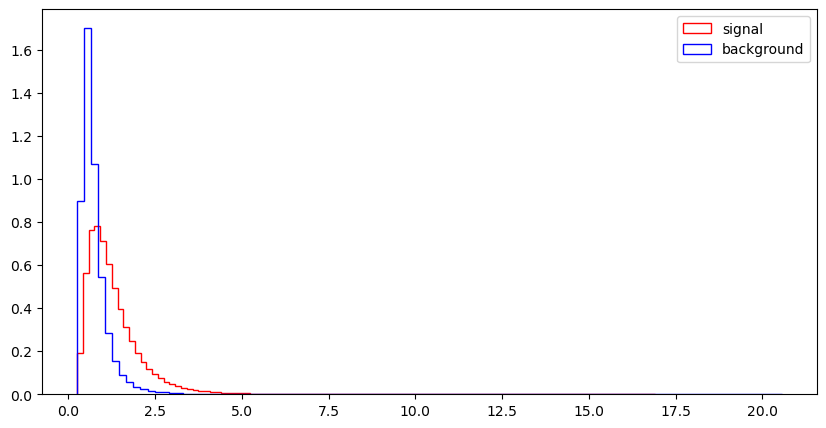

l_1_eta


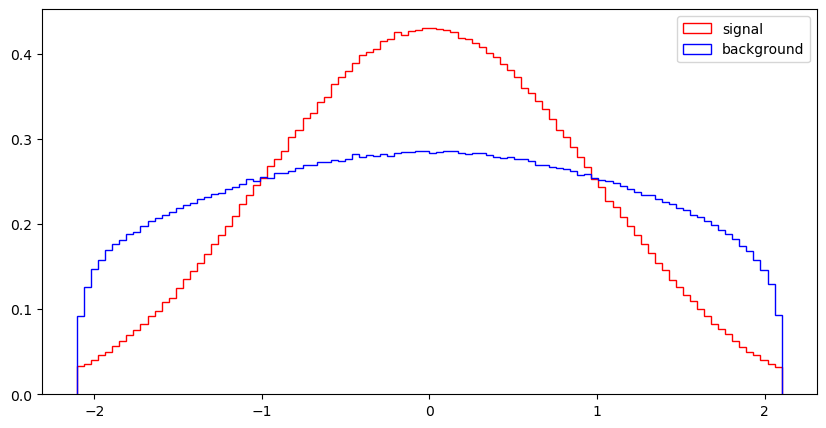

l_1_phi


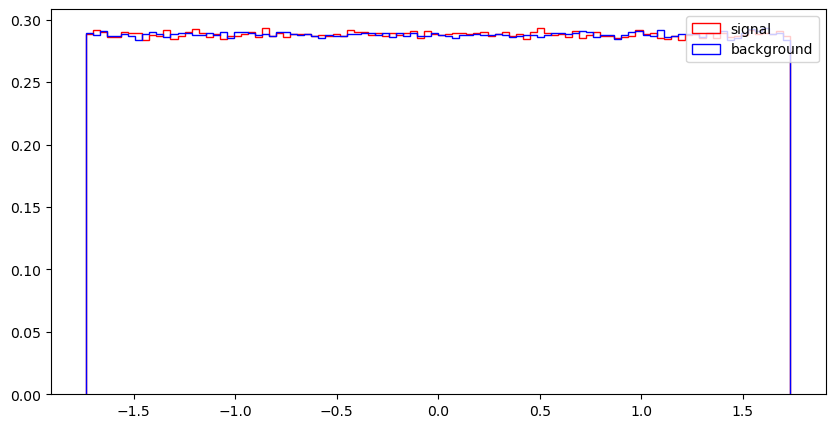

l_2_pT


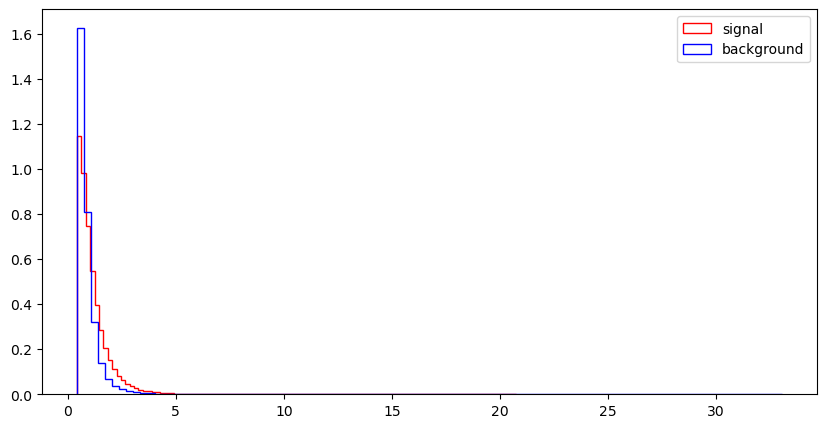

l_2_eta


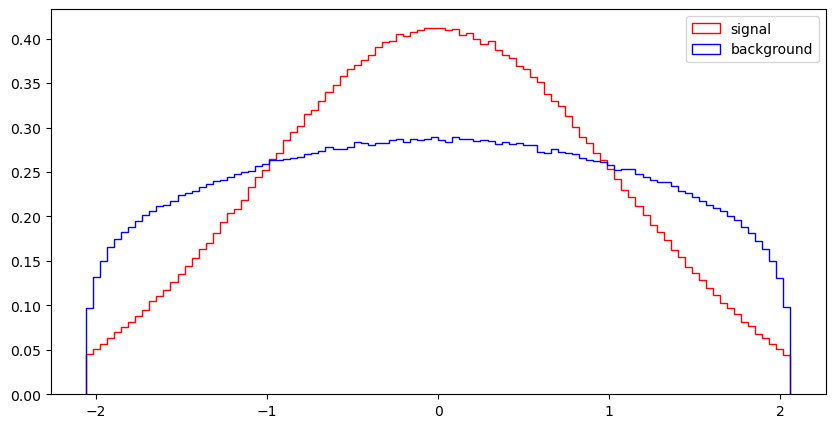

l_2_phi


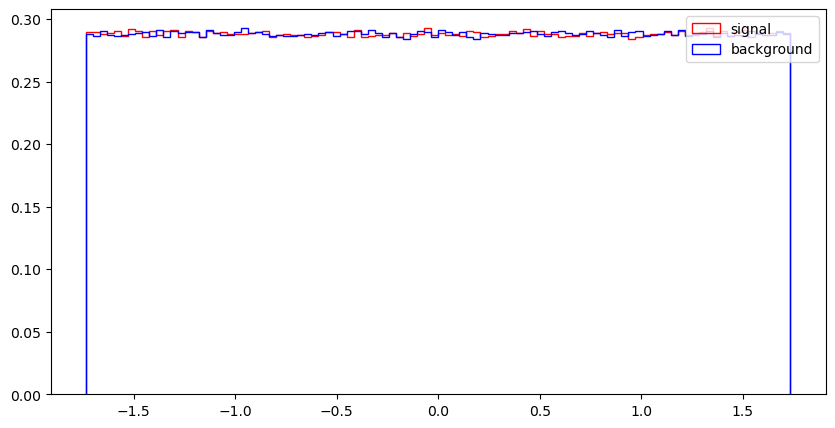

MET


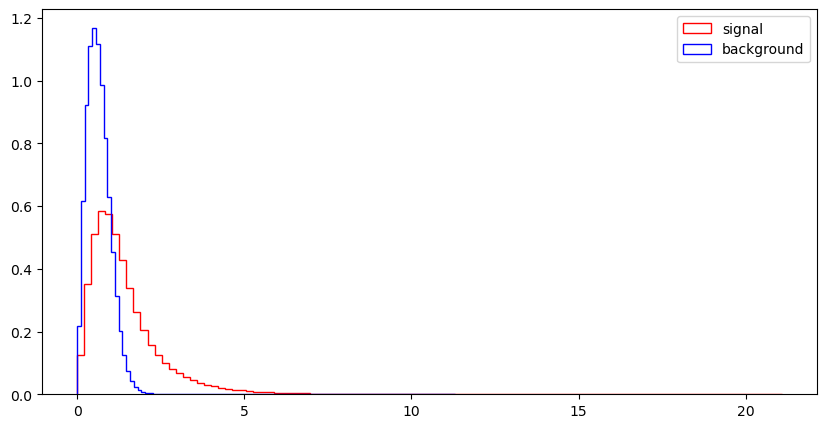

MET_phi


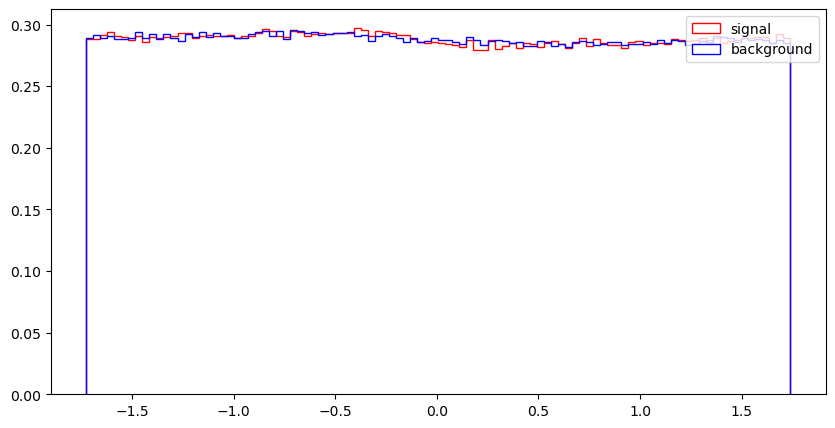

MET_rel


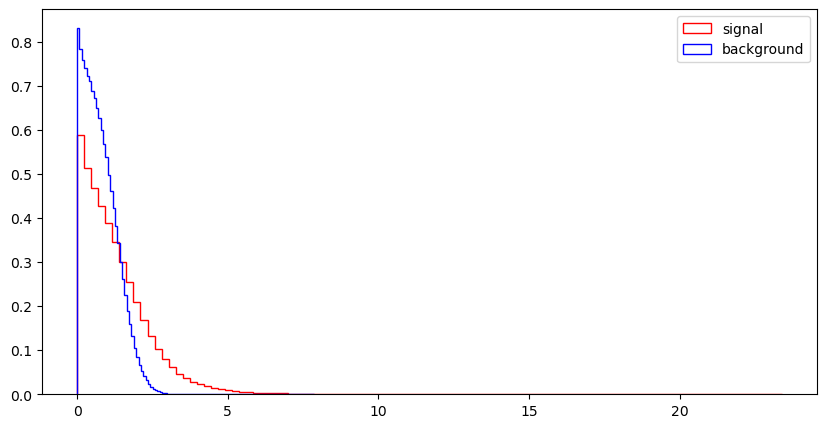

axial_MET


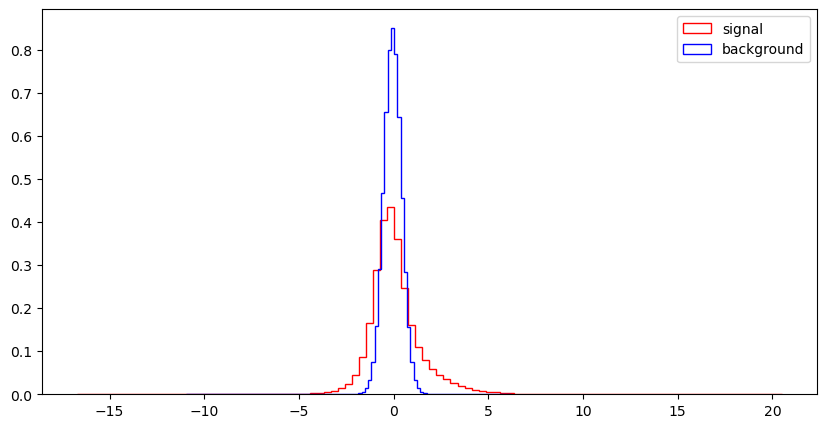

M_R


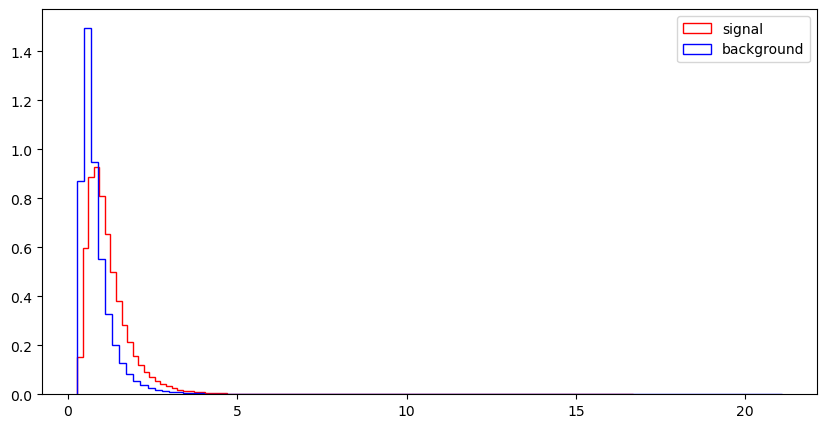

M_TR_2


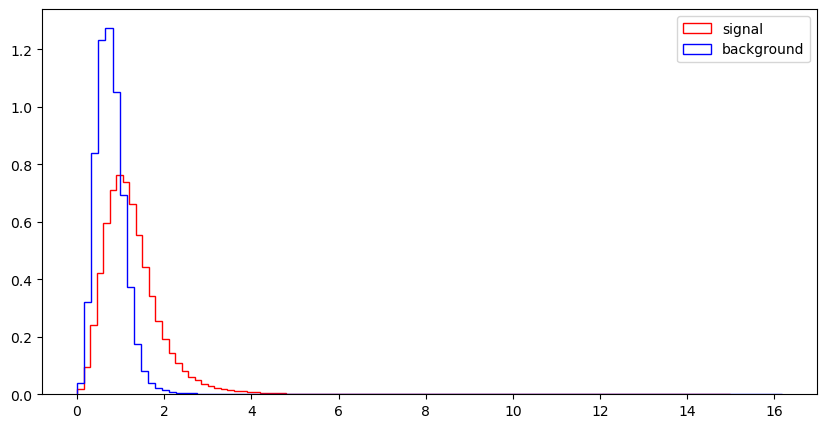

R


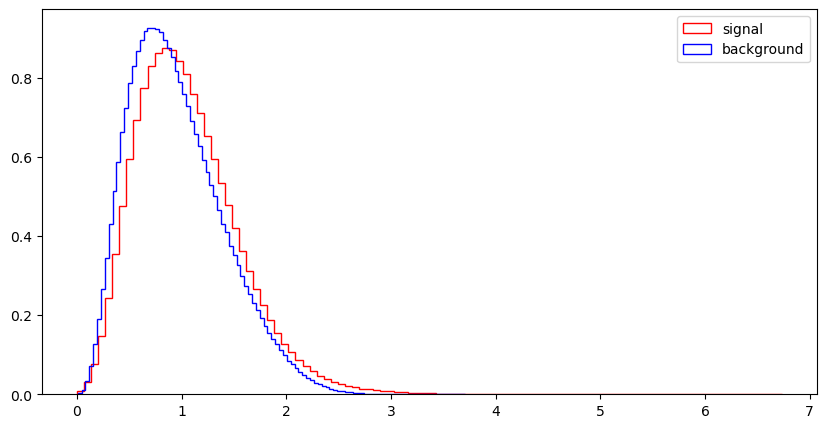

MT2


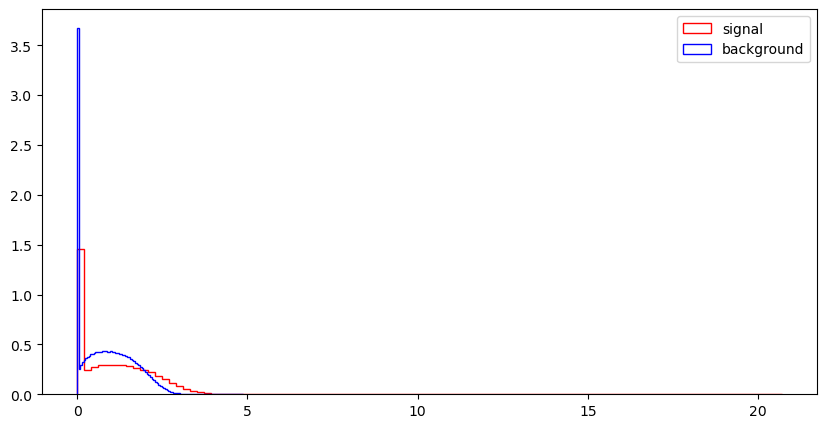

S_R


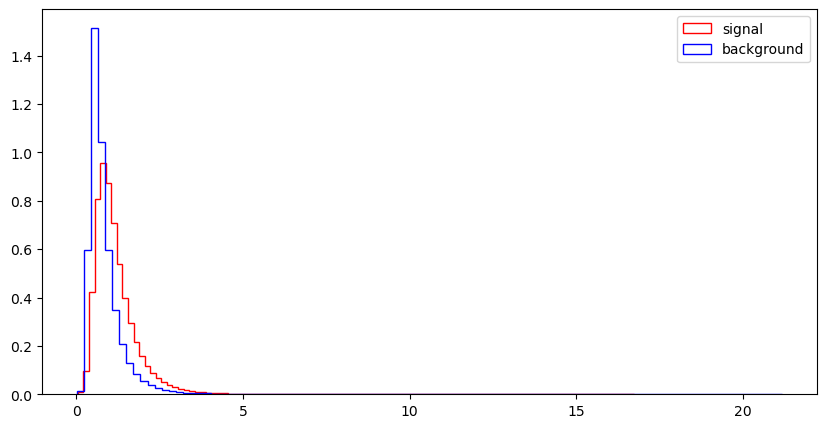

M_Delta_R


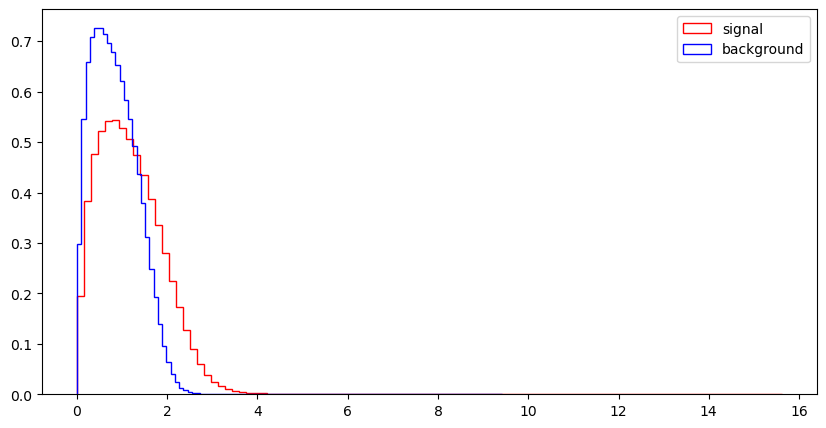

dPhi_r_b


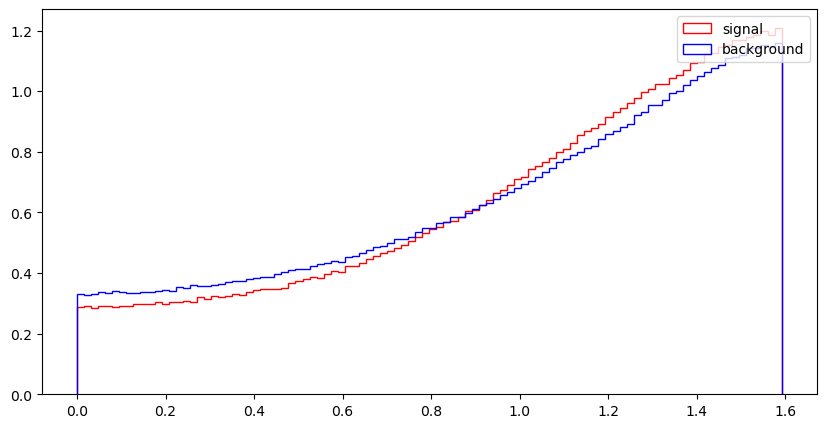

cos_theta_r1


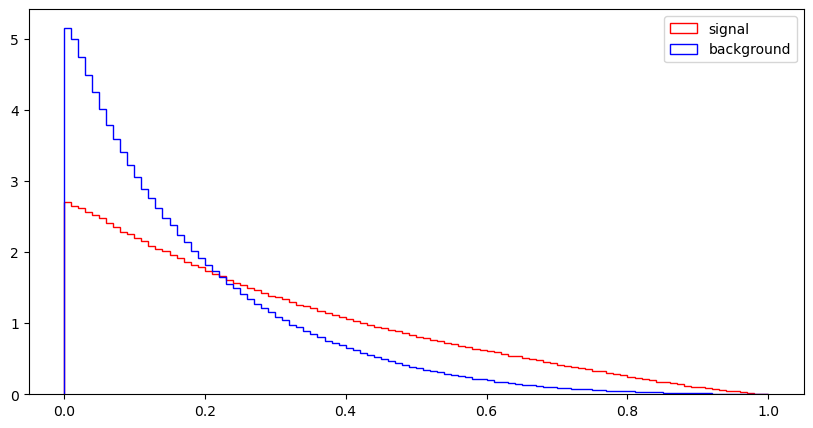

In [41]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(ds_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(ds_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

In [36]:
filename = "SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]
low_level=VarNames[1:9]
high_level=VarNames[9:]

In [16]:
def recreate_fig(feature):
    for i in feature:
        print (i)
        plt.figure(figsize=(10,5))
        plt.hist(np.array(df_sig[i]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
        plt.hist(np.array(df_bkg[i]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
        plt.legend(loc='upper right')
        plt.show()

l_1_pT


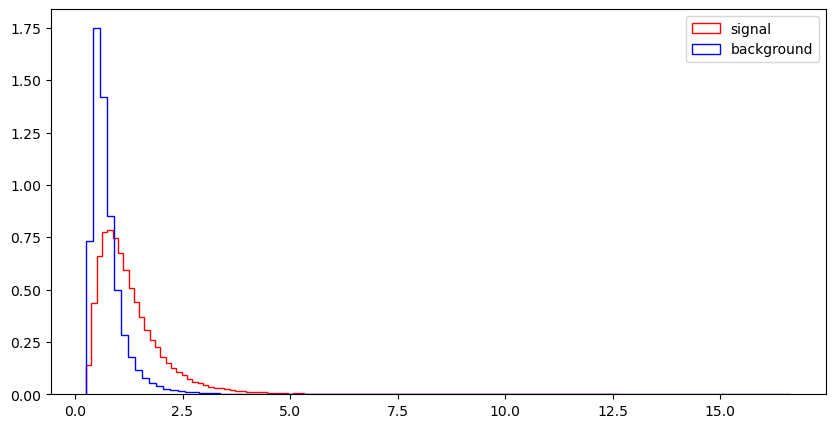

l_1_eta


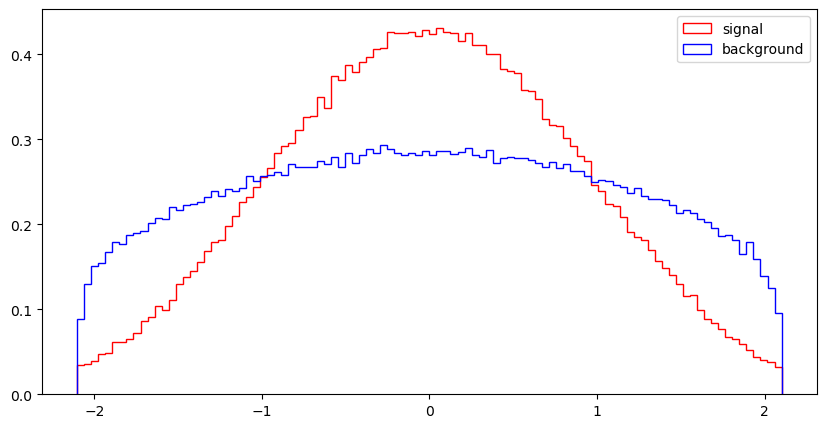

l_1_phi


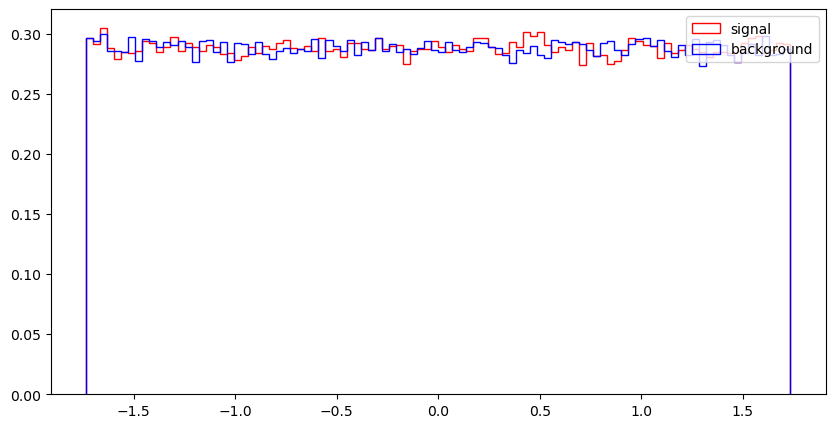

l_2_pT


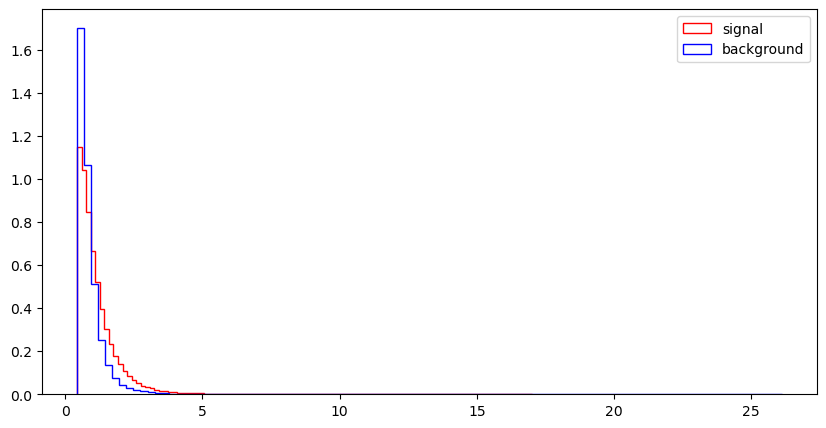

l_2_eta


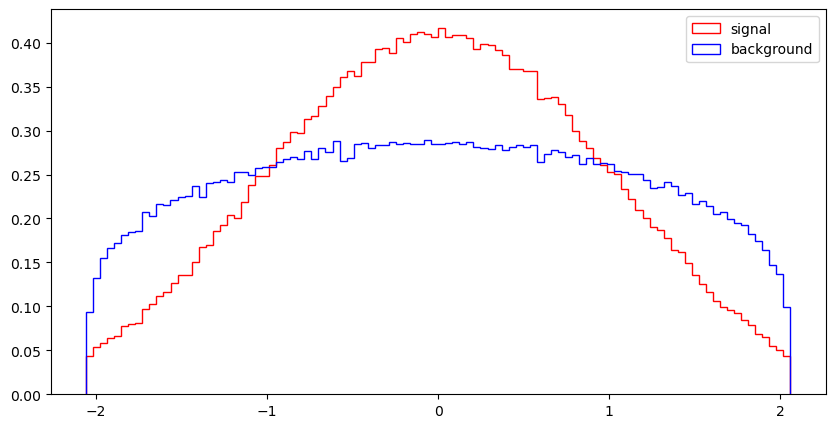

l_2_phi


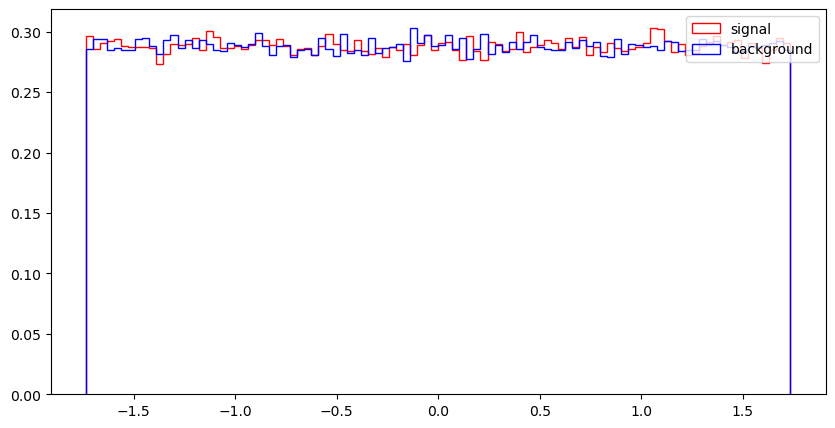

MET


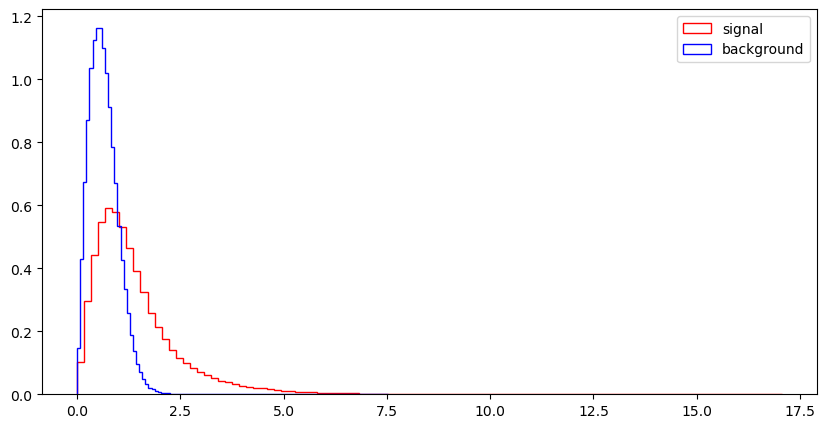

MET_phi


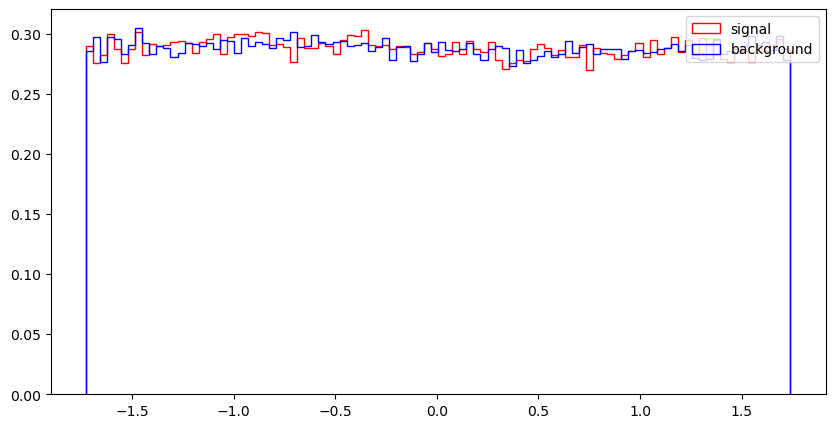

In [18]:
recreate_fig(low_level) #similar to fig 5 - low-level feature

MET_rel


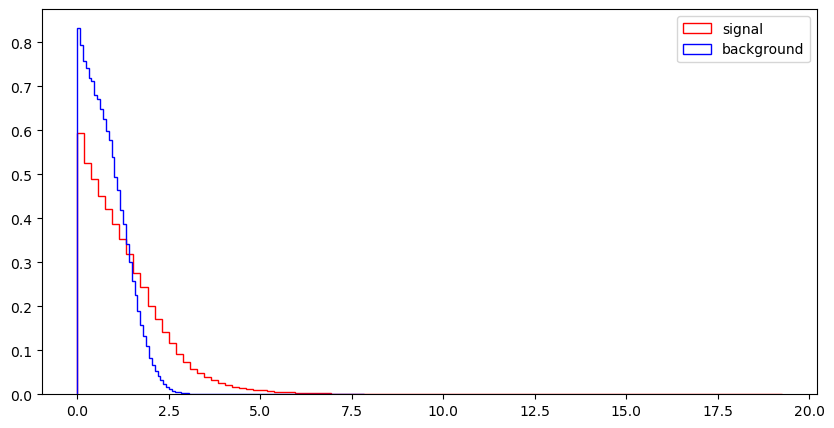

axial_MET


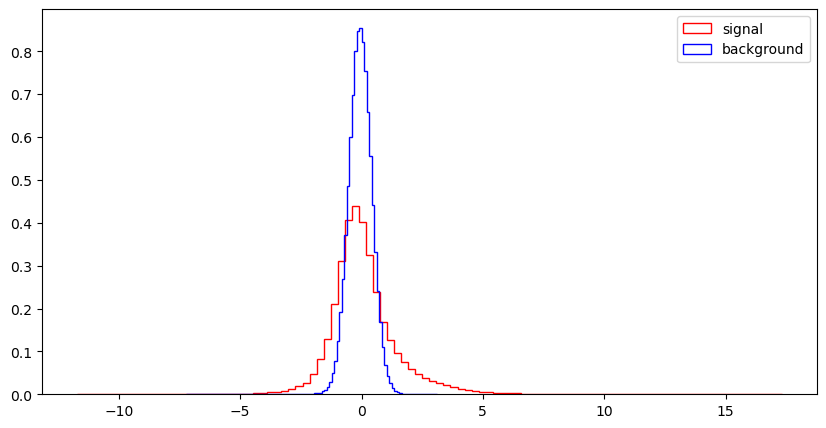

M_R


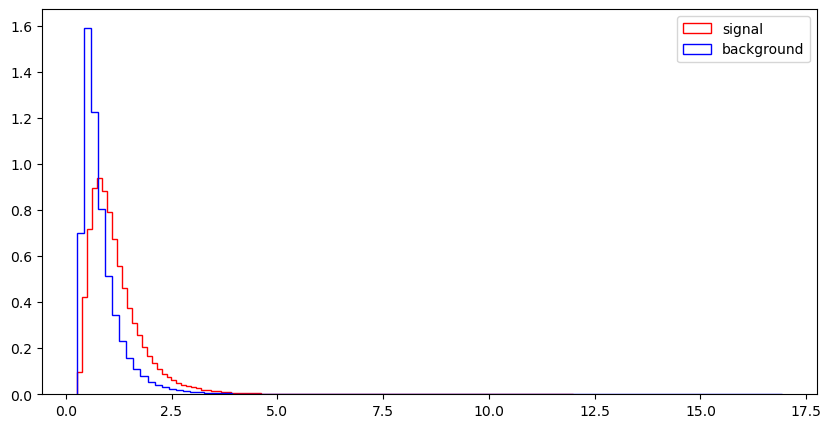

M_TR_2


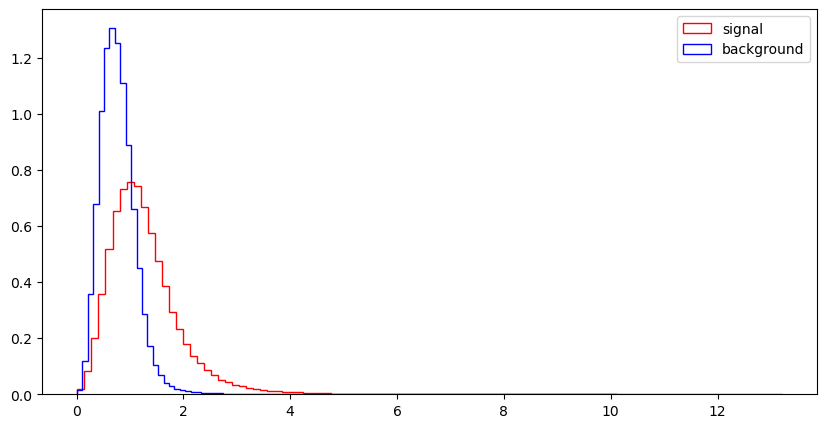

R


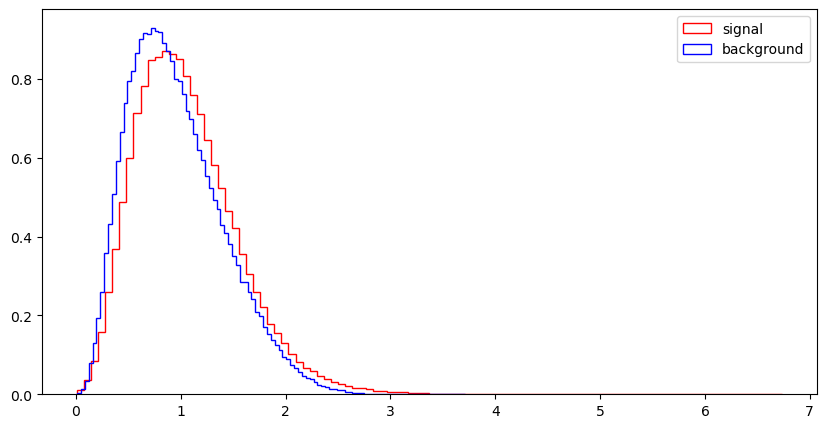

MT2


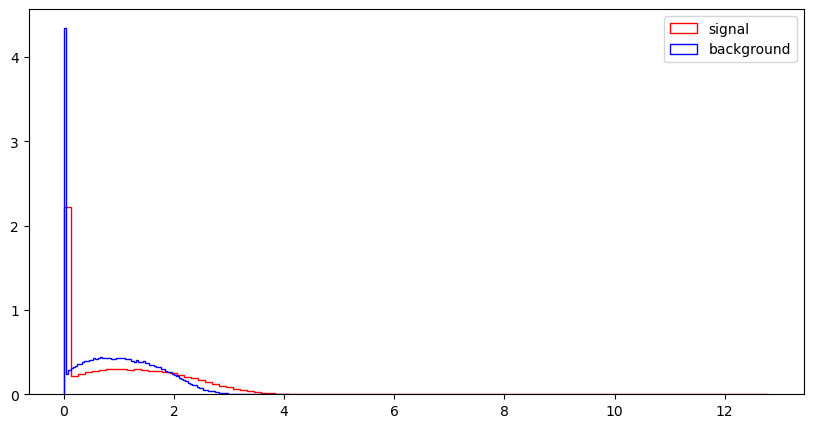

S_R


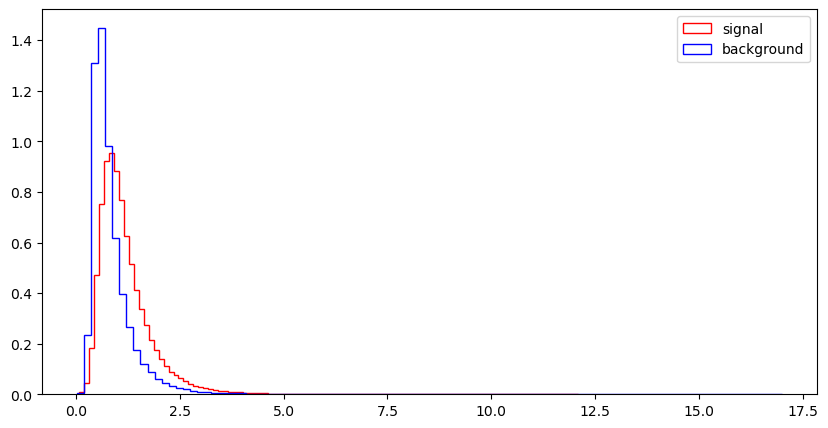

M_Delta_R


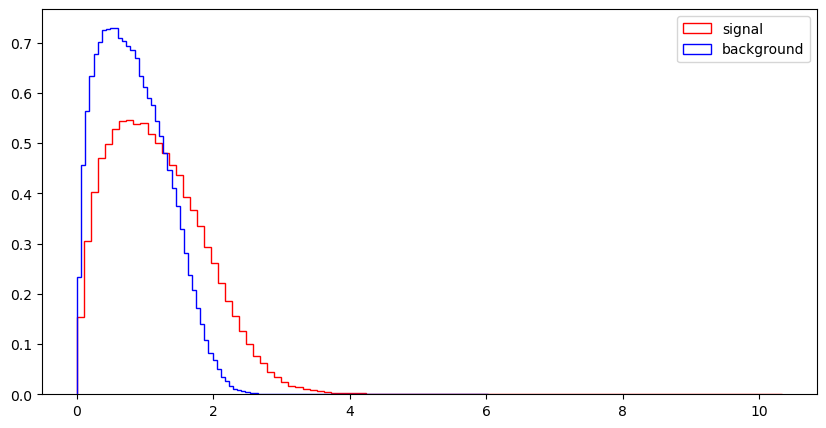

dPhi_r_b


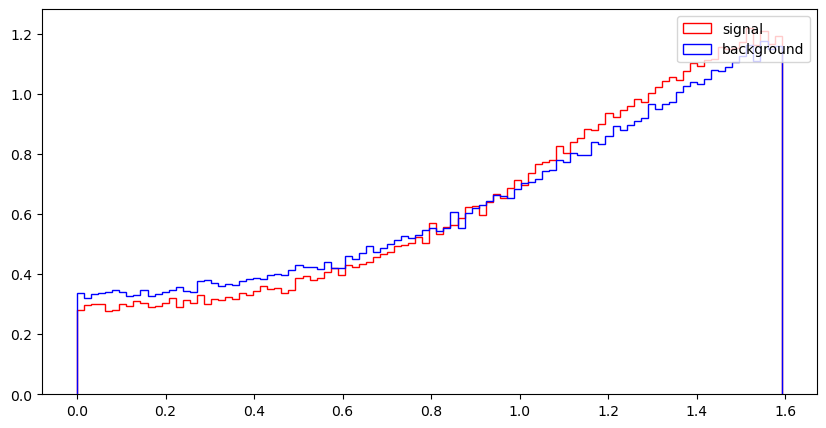

cos_theta_r1


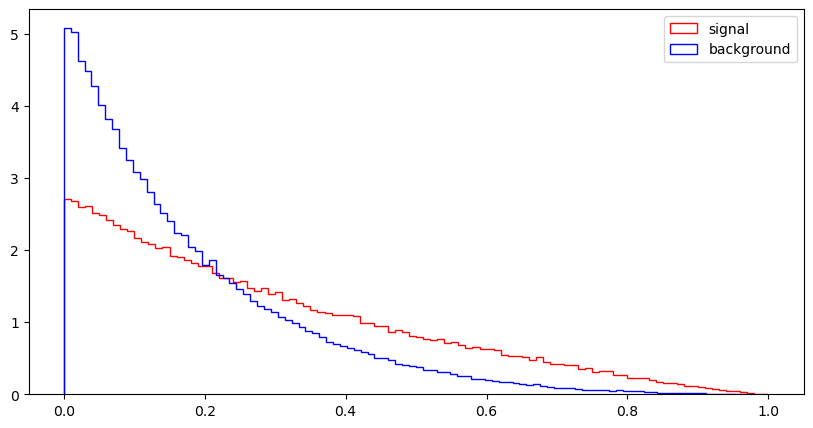

In [22]:
#similar to fig 6 in paper - high-level features
recreate_fig(high_level)

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

## Exercise 4.1 part A

In [54]:
def compare_distributions(df,column_name,selections,ax=None,**kwargs):
    for label,selection in selections.items():        
        ax.hist(df[selection][column_name],histtype='step',label=label,**kwargs)

    ax.legend()

In [190]:
def recreate(feature):
    selection_dict={"Signal":df["signal"]==1.,"Background":df["signal"]!=1}
    
    #adjust amount of plots on grid dynamically
    num_feature=len(feature)
    cols=3
    rows=(num_feature+cols-1)//cols
    fig,ax=plt.subplots(5,3,figsize=(15, 5*rows))
    
    ax=ax.flatten()
    
    for i,feature in enumerate(feature):
        
        compare_distributions(df,feature,
                         selection_dict,
                         alpha=0.5,
                         density=1,
                         bins=25, 
                         ax=ax[i]
                         ) 
        ax[i].set_xlabel(feature)
        
    for j in range(i+1, len(ax)): #hide emty plots on grid
        fig.delaxes(ax[j])
        
    plt.tight_layout()
    plt.show()

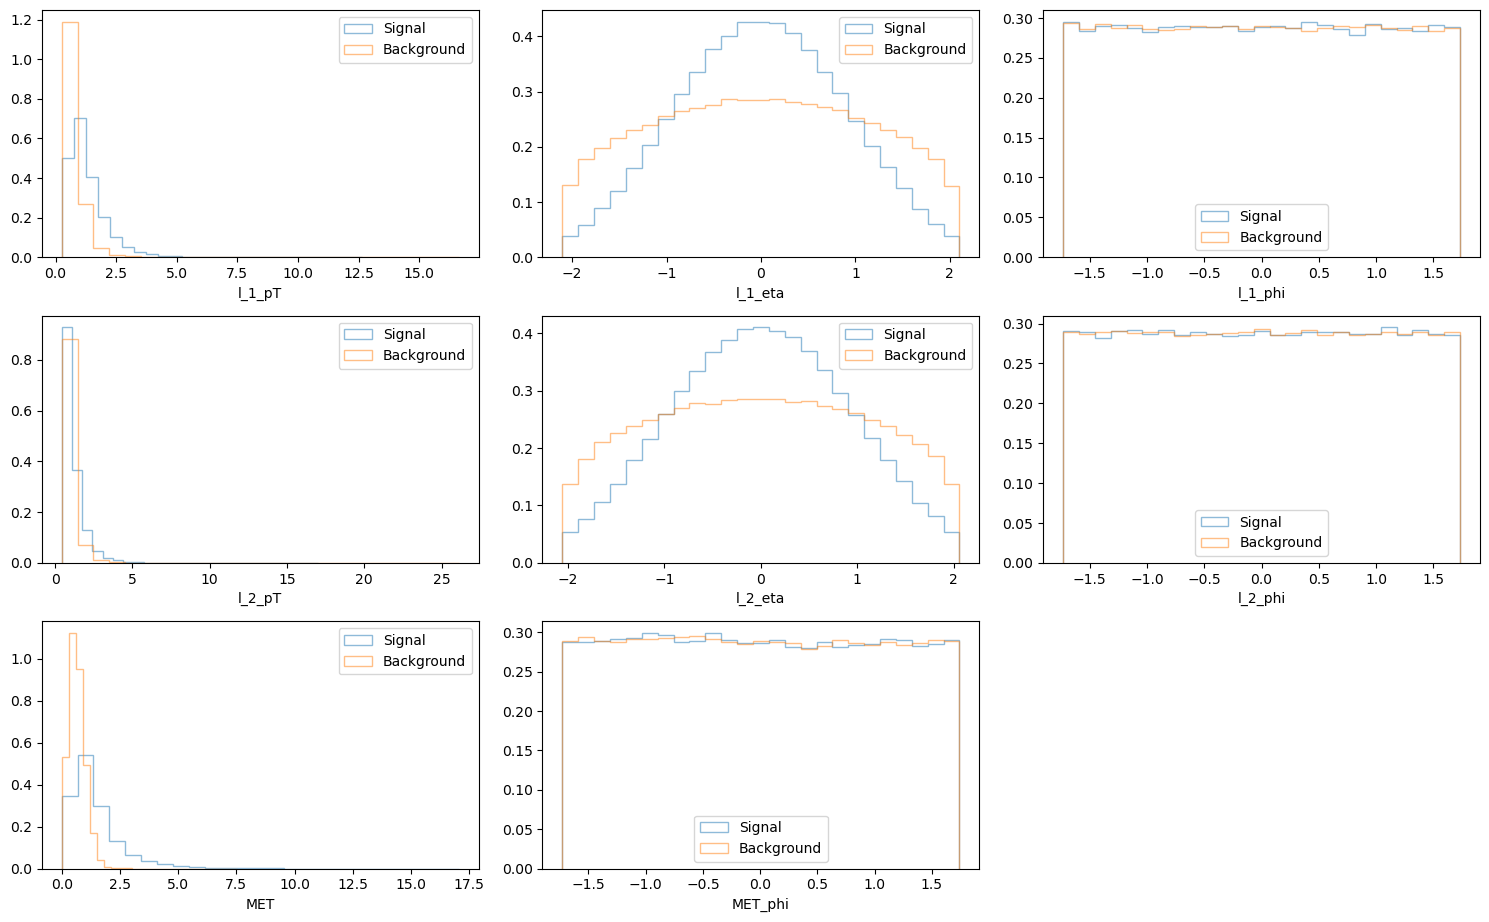

In [178]:
recreate(low_level)

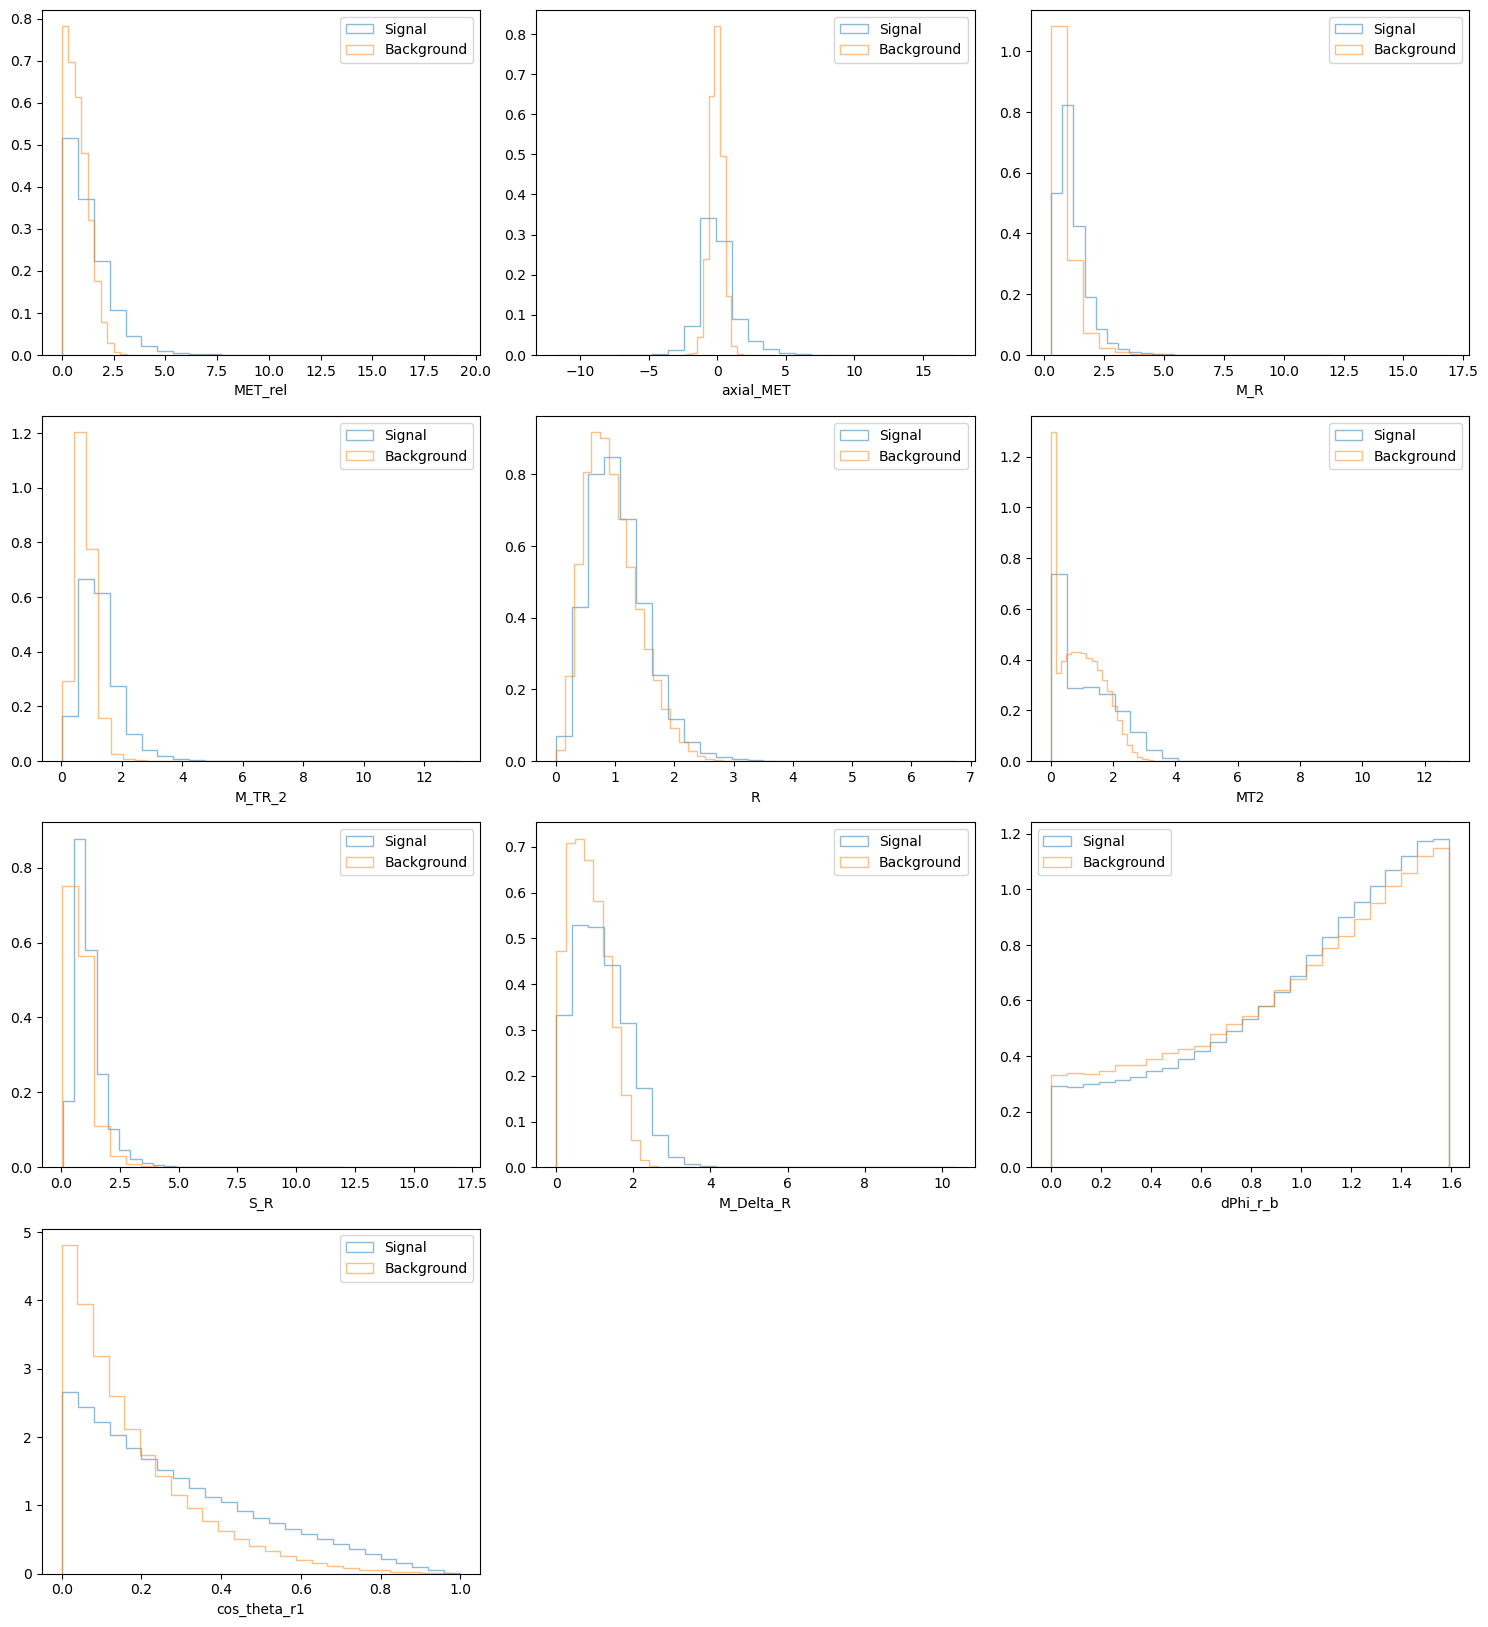

In [180]:
recreate(high_level)

## Exercise 4.1 part B

In [194]:
#I'm not sure if it actually is faster, but it is a different way to make pairplots

def recreate_fast(features):
    selection_dict = {"Signal": df["signal"] == 1., "Background": df["signal"] != 1}
    
    num_features = len(features)
    cols = 3  
    rows = (num_features + cols - 1) // cols  

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        
        # make array and pass multiple datasets at once
        data = [df.loc[selection, feature].values for selection in selection_dict.values()]
        labels = list(selection_dict.keys())
        ax.hist(data, bins=25, histtype="step", label=labels, density=1)
        
        ax.set_xlabel(feature)
        ax.legend()

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

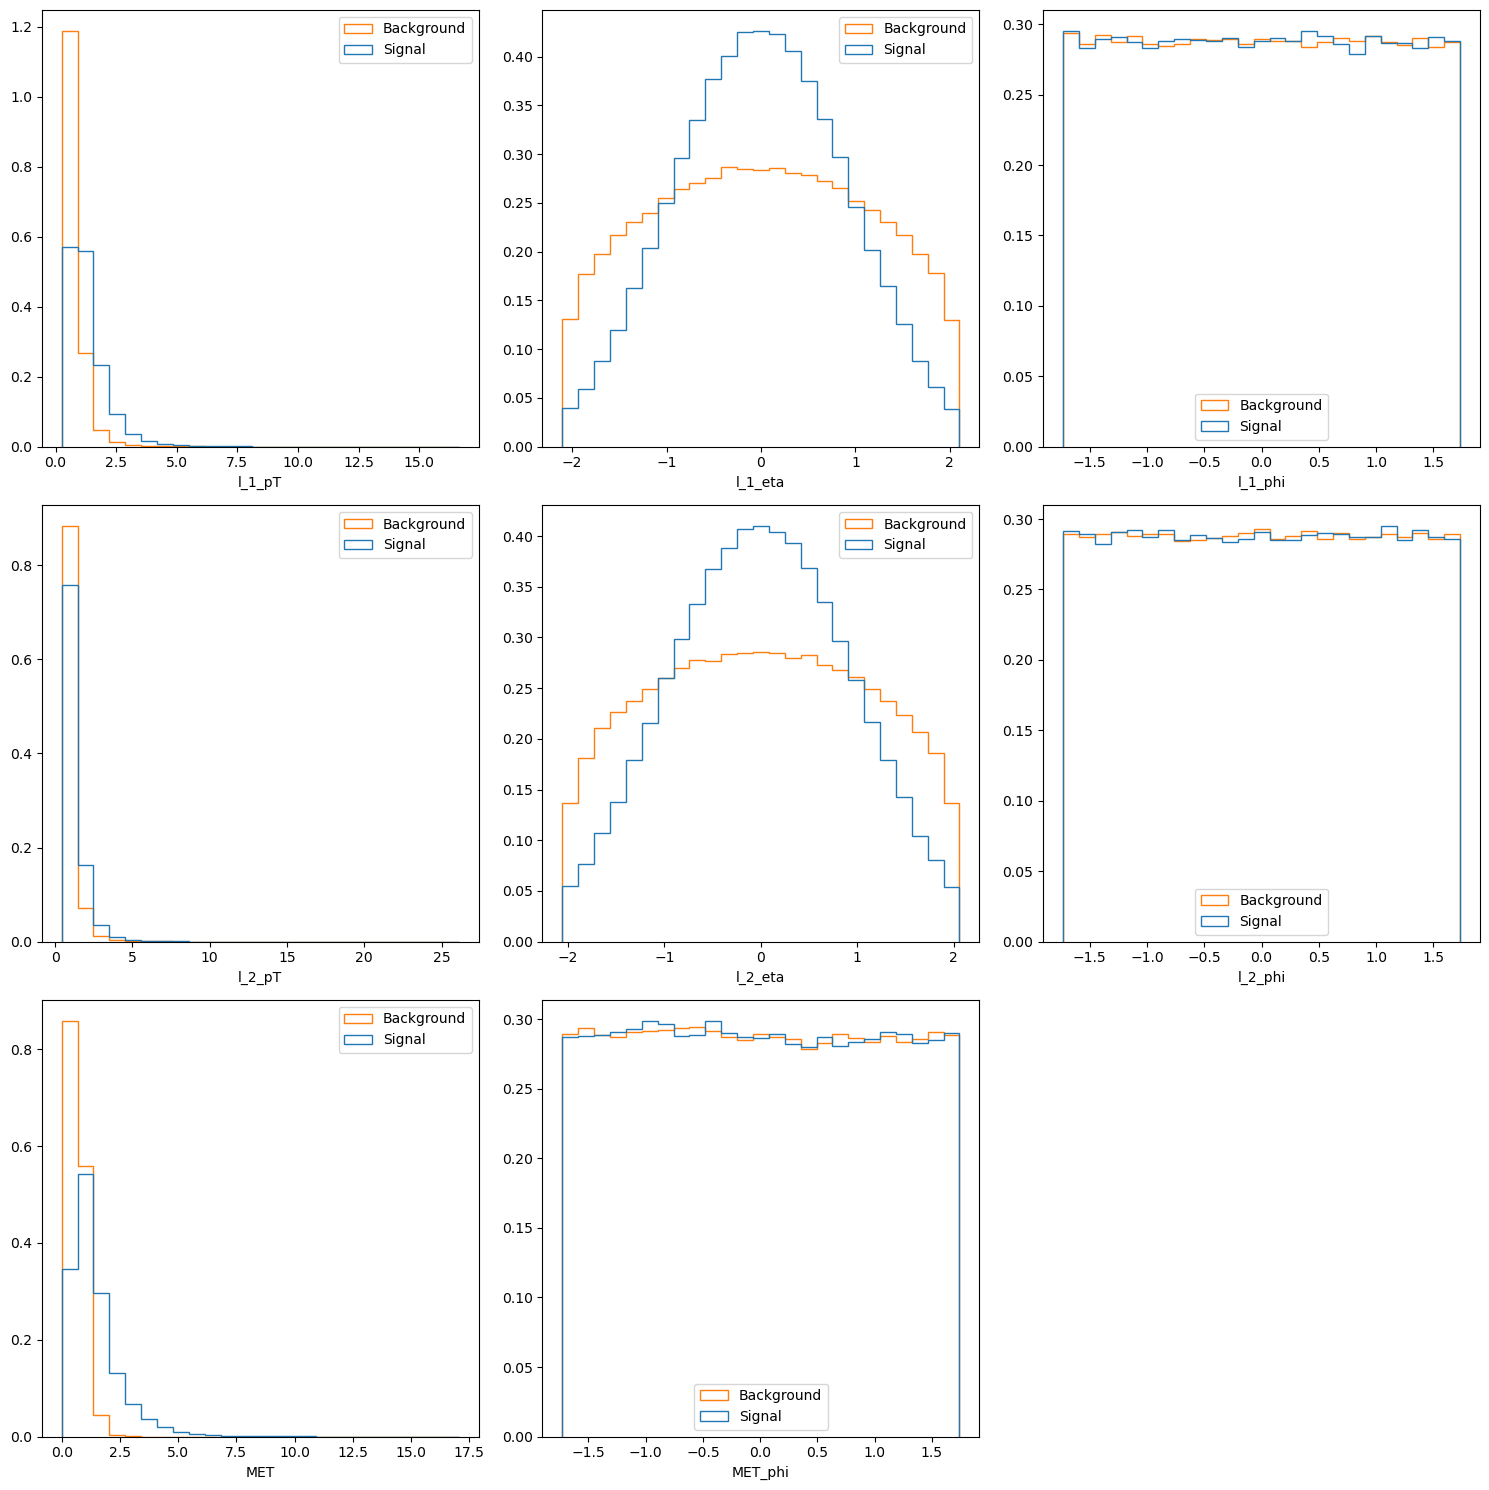

In [184]:
recreate_fast(low_level)

## Exercise 4.1 part C

Observables appear to be best for separating signal and background:
- low-level features: L1_pt, MET, potentially l_1_eta and l_2_eta as well
- high-level features: M_R, M_TR_2, M_Delta_R, and cos_theta_r1

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

Hint: Example code for embedding a `tabulate` table into a notebook:

In [38]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## 4.2 part A

In [280]:
from IPython.display import HTML, display
import tabulate 

## 4.2 part B

In [88]:
#make arrays
all_level_data=df.drop(columns=['signal']).values
low_level_data=df[low_level].values
high_level_data= df[high_level].values

#covariance matrix and correlation matrix for all obersvables
cova_m_all=np.cov(all_level_data.T)
core_m_all=np.corrcoef(all_level_data.T)

#covariance matrix for low, high level features
cova_m_low=np.cov(low_level_data.T)
cova_m_high=np.cov(high_level_data.T)

#correlation matrix for low, high level features
core_m_low=np.corrcoef(low_level_data.T)
core_m_high=np.corrcoef(high_level_data.T)

## 4.2 part C

In [92]:
table_all_cova = tabulate.tabulate(cova_m_all, tablefmt='html', headers=VarNames[1:])
display(HTML(f"<h3>Covariance Matrix - All Observables</h3>{table_all_cova}"))

table_all_core = tabulate.tabulate(core_m_all, tablefmt='html', headers=VarNames[1:])
display(HTML(f"<h3>Correlation Matrix - All Observables</h3>{table_all_core}"))

table_low_cova = tabulate.tabulate(cova_m_low, tablefmt='html', headers=VarNames[1:])
display(HTML(f"<h3>Covariance Matrix - Low Features</h3>{table_low_cova}"))

table_high_cova = tabulate.tabulate(cova_m_high, tablefmt='html', headers=VarNames[1:])
display(HTML(f"<h3>Covariance Matrix - High Features</h3>{table_high_cova}"))

table_low_core = tabulate.tabulate(core_m_low, tablefmt='html', headers=VarNames[1:])
display(HTML(f"<h3>Correlation Matrix - Low Features</h3>{table_low_core}"))

table_high_core = tabulate.tabulate(core_m_high, tablefmt='html', headers=VarNames[1:])
display(HTML(f"<h3>Correlation Matrix - High Features</h3>{table_high_core}"))


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.467482,-0.000396674,7.66214e-05,0.305038,-0.000348827,0.000737337,0.228434,-0.000936714,0.097524,-0.00973254,0.364432,0.287223,-0.0597025,-0.0123988,0.342587,0.0977389,-0.0469491,0.0221632
-0.000396674,1.0043,-0.000857631,-0.000162906,0.408313,-0.00104201,-0.00214698,-0.000588968,-0.00137057,-0.00110889,-0.000553827,-0.00066892,0.0003013,0.000427123,-0.00060401,-0.000987471,-0.00074033,0.000321632
7.66214e-05,-0.000857631,1.00397,0.00131296,0.000250715,-0.26681,0.000766366,-0.184804,0.000706206,-0.00187269,0.00106307,0.000868783,0.000201596,0.00106029,0.00146377,0.000901233,0.000994306,0.000259098
0.305038,-0.000162906,0.00131296,0.42549,-0.000575571,0.000155884,0.0794519,-0.00156177,-0.000533893,0.0513299,0.325434,0.162941,-0.0993511,-0.0688858,0.32194,0.00571563,-0.00383465,-0.0279102
-0.000348827,0.408313,0.000250715,-0.000575571,1.00626,0.000441588,0.000381652,-0.000322449,0.00108429,-0.000756451,-0.000607671,1.88755e-05,0.000320625,0.00139889,-0.000678582,0.000670436,-0.000306871,0.000296341
0.000737337,-0.00104201,-0.26681,0.000155884,0.000441588,1.0038,-0.000303976,-0.0354343,0.00144703,-0.0018005,0.000759915,0.00050892,0.000551145,0.00225915,0.000906438,0.0013266,-0.000241209,3.70399e-05
0.228434,-0.00214698,0.000766366,0.0794519,0.000381652,-0.000303976,0.762249,-0.00279213,0.546481,0.153956,0.144522,0.365194,0.187912,0.154785,0.165543,0.315143,0.145682,0.0730924
-0.000936714,-0.000588968,-0.184804,-0.00156177,-0.000322449,-0.0354343,-0.00279213,1.00331,-0.0048952,-0.000441791,-0.00148315,-0.001201,-0.00022953,8.38685e-05,-0.00170675,-0.000569851,-0.00170906,0.000119405
0.097524,-0.00137057,0.000706206,-0.000533893,0.00108429,0.00144703,0.546481,-0.0048952,0.790489,-0.119851,0.0436845,0.301993,0.248824,0.408779,0.0823154,0.414743,0.146439,0.0553179
-0.00973254,-0.00110889,-0.00187269,0.0513299,-0.000756451,-0.0018005,0.153956,-0.000441791,-0.119851,1.00537,0.0171346,-0.185017,-0.1809,-0.460999,-0.0413828,-0.233074,-0.0251128,-0.0537349


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,-0.000578921,0.000111842,0.683954,-0.000508594,0.00107637,0.382675,-0.00136775,0.160428,-0.0141965,0.851136,0.722754,-0.185501,-0.021114,0.810678,0.229309,-0.157454,0.164501
-0.000578921,1,-0.000854097,-0.000249206,0.406167,-0.00103781,-0.00245385,-0.000586735,-0.00153823,-0.00110355,-0.000882483,-0.0011484,0.00063871,0.000496241,-0.000975151,-0.00158062,-0.00169395,0.00162871
0.000111842,-0.000854097,1,0.00200884,0.000249438,-0.265777,0.000876046,-0.184133,0.000792725,-0.00186398,0.0016942,0.00149177,0.000427422,0.00123207,0.00236358,0.00144282,0.00227545,0.00131226
0.683954,-0.000249206,0.00200884,1,-0.000879627,0.000238525,0.139512,-0.00239031,-0.000920581,0.0784805,0.796679,0.429772,-0.323567,-0.122958,0.798528,0.0140558,-0.01348,-0.217138
-0.000508594,0.406167,0.000249438,-0.000879627,1,0.000439378,0.000435776,-0.000320913,0.00121574,-0.000752075,-0.000967334,3.2374e-05,0.000679012,0.00162368,-0.00109448,0.0010721,-0.000701469,0.00149917
0.00107637,-0.00103781,-0.265777,0.000238525,0.000439378,1,-0.00034751,-0.0353088,0.00162445,-0.00179228,0.00121117,0.000873935,0.00116864,0.00262539,0.00146378,0.00212398,-0.000552051,0.000187613
0.382675,-0.00245385,0.000876046,0.139512,0.000435776,-0.00034751,1,-0.00319278,0.70401,0.175867,0.264332,0.719661,0.457239,0.20642,0.306776,0.579022,0.382618,0.424855
-0.00136775,-0.000586735,-0.184133,-0.00239031,-0.000320913,-0.0353088,-0.00319278,1,-0.00549673,-0.000439881,-0.00236446,-0.0020629,-0.000486809,9.74883e-05,-0.00275684,-0.000912596,-0.00391244,0.000604952
0.160428,-0.00153823,0.000792725,-0.000920581,0.00121574,0.00162445,0.70401,-0.00549673,1,-0.134441,0.0784593,0.584388,0.594539,0.535318,0.149794,0.748284,0.377675,0.315743
-0.0141965,-0.00110355,-0.00186398,0.0784805,-0.000752075,-0.00179228,0.175867,-0.000439881,-0.134441,1,0.0272881,-0.317468,-0.383276,-0.535313,-0.0667754,-0.372877,-0.0574301,-0.271963


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
0.467482,-0.000396674,7.66214e-05,0.305038,-0.000348827,0.000737337,0.228434,-0.000936714
-0.000396674,1.0043,-0.000857631,-0.000162906,0.408313,-0.00104201,-0.00214698,-0.000588968
7.66214e-05,-0.000857631,1.00397,0.00131296,0.000250715,-0.26681,0.000766366,-0.184804
0.305038,-0.000162906,0.00131296,0.42549,-0.000575571,0.000155884,0.0794519,-0.00156177
-0.000348827,0.408313,0.000250715,-0.000575571,1.00626,0.000441588,0.000381652,-0.000322449
0.000737337,-0.00104201,-0.26681,0.000155884,0.000441588,1.0038,-0.000303976,-0.0354343
0.228434,-0.00214698,0.000766366,0.0794519,0.000381652,-0.000303976,0.762249,-0.00279213
-0.000936714,-0.000588968,-0.184804,-0.00156177,-0.000322449,-0.0354343,-0.00279213,1.00331


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET
0.790489,-0.119851,0.0436845,0.301993,0.248824,0.408779,0.0823154,0.414743,0.146439,0.0553179
-0.119851,1.00537,0.0171346,-0.185017,-0.1809,-0.460999,-0.0413828,-0.233074,-0.0251128,-0.0537349
0.0436845,0.0171346,0.392167,0.209875,-0.112904,-0.0365444,0.379763,0.07393,-0.0289617,-0.0143412
0.301993,-0.185017,0.209875,0.337827,0.104014,0.18917,0.228125,0.241865,0.058133,0.0516659
0.248824,-0.1809,-0.112904,0.104014,0.221578,0.2321,-0.0833587,0.165483,0.0870914,0.0581608
0.408779,-0.460999,-0.0365444,0.18917,0.2321,0.737661,-0.0110375,0.432897,0.0208972,0.0446289
0.0823154,-0.0413828,0.379763,0.228125,-0.0833587,-0.0110375,0.382015,0.0957808,-0.00345651,-0.0103629
0.414743,-0.233074,0.07393,0.241865,0.165483,0.432897,0.0957808,0.388624,0.0422407,0.0392089
0.146439,-0.0251128,-0.0289617,0.058133,0.0870914,0.0208972,-0.00345651,0.0422407,0.190188,0.00908347
0.0553179,-0.0537349,-0.0143412,0.0516659,0.0581608,0.0446289,-0.0103629,0.0392089,0.00908347,0.0388299


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi
1,-0.000578921,0.000111842,0.683954,-0.000508594,0.00107637,0.382675,-0.00136775
-0.000578921,1,-0.000854097,-0.000249206,0.406167,-0.00103781,-0.00245385,-0.000586735
0.000111842,-0.000854097,1,0.00200884,0.000249438,-0.265777,0.000876046,-0.184133
0.683954,-0.000249206,0.00200884,1,-0.000879627,0.000238525,0.139512,-0.00239031
-0.000508594,0.406167,0.000249438,-0.000879627,1,0.000439378,0.000435776,-0.000320913
0.00107637,-0.00103781,-0.265777,0.000238525,0.000439378,1,-0.00034751,-0.0353088
0.382675,-0.00245385,0.000876046,0.139512,0.000435776,-0.00034751,1,-0.00319278
-0.00136775,-0.000586735,-0.184133,-0.00239031,-0.000320913,-0.0353088,-0.00319278,1


l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET
1,-0.134441,0.0784593,0.584388,0.594539,0.535318,0.149794,0.748284,0.377675,0.315743
-0.134441,1,0.0272881,-0.317468,-0.383276,-0.535313,-0.0667754,-0.372877,-0.0574301,-0.271963
0.0784593,0.0272881,1,0.576603,-0.383011,-0.0679449,0.981155,0.189374,-0.106046,-0.116216
0.584388,-0.317468,0.576603,1,0.380174,0.378944,0.635017,0.667515,0.229342,0.4511
0.594539,-0.383276,-0.383011,0.380174,1,0.574095,-0.286515,0.56393,0.424248,0.627024
0.535318,-0.535313,-0.0679449,0.378944,0.574095,1,-0.0207923,0.808521,0.0557916,0.263697
0.149794,-0.0667754,0.981155,0.635017,-0.286515,-0.0207923,1,0.248584,-0.0128235,-0.085086
0.748284,-0.372877,0.189374,0.667515,0.56393,0.808521,0.248584,1,0.155372,0.31918
0.377675,-0.0574301,-0.106046,0.229342,0.424248,0.0557916,-0.0128235,0.155372,1,0.1057
0.315743,-0.271963,-0.116216,0.4511,0.627024,0.263697,-0.085086,0.31918,0.1057,1


## 4.2 part D

In [82]:
def make_tables(ds,feature,title):
    
    data=ds[feature].values #make array from features
    
    #calculations
    cova_matrix=np.cov(data.T)
    core_matrix=np.corrcoef(data.T)
    #tables
    table_cova = tabulate.tabulate(cova_matrix, tablefmt='html', headers=feature)
    table_core = tabulate.tabulate(core_matrix, tablefmt='html', headers=feature)
    #display
    display(HTML(f"<h3>Covariance Matrix - {title} </h3>{table_cova}"))
    display(HTML(f"<h3>Correlation Matrix - {title} </h3>{table_core}"))

In [84]:
make_tables(df,high_level, 'High Level Features')

MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0.790489,-0.119851,0.0436845,0.301993,0.248824,0.408779,0.0823154,0.414743,0.146439,0.0553179
-0.119851,1.00537,0.0171346,-0.185017,-0.1809,-0.460999,-0.0413828,-0.233074,-0.0251128,-0.0537349
0.0436845,0.0171346,0.392167,0.209875,-0.112904,-0.0365444,0.379763,0.07393,-0.0289617,-0.0143412
0.301993,-0.185017,0.209875,0.337827,0.104014,0.18917,0.228125,0.241865,0.058133,0.0516659
0.248824,-0.1809,-0.112904,0.104014,0.221578,0.2321,-0.0833587,0.165483,0.0870914,0.0581608
0.408779,-0.460999,-0.0365444,0.18917,0.2321,0.737661,-0.0110375,0.432897,0.0208972,0.0446289
0.0823154,-0.0413828,0.379763,0.228125,-0.0833587,-0.0110375,0.382015,0.0957808,-0.00345651,-0.0103629
0.414743,-0.233074,0.07393,0.241865,0.165483,0.432897,0.0957808,0.388624,0.0422407,0.0392089
0.146439,-0.0251128,-0.0289617,0.058133,0.0870914,0.0208972,-0.00345651,0.0422407,0.190188,0.00908347
0.0553179,-0.0537349,-0.0143412,0.0516659,0.0581608,0.0446289,-0.0103629,0.0392089,0.00908347,0.0388299


MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
1,-0.134441,0.0784593,0.584388,0.594539,0.535318,0.149794,0.748284,0.377675,0.315743
-0.134441,1,0.0272881,-0.317468,-0.383276,-0.535313,-0.0667754,-0.372877,-0.0574301,-0.271963
0.0784593,0.0272881,1,0.576603,-0.383011,-0.0679449,0.981155,0.189374,-0.106046,-0.116216
0.584388,-0.317468,0.576603,1,0.380174,0.378944,0.635017,0.667515,0.229342,0.4511
0.594539,-0.383276,-0.383011,0.380174,1,0.574095,-0.286515,0.56393,0.424248,0.627024
0.535318,-0.535313,-0.0679449,0.378944,0.574095,1,-0.0207923,0.808521,0.0557916,0.263697
0.149794,-0.0667754,0.981155,0.635017,-0.286515,-0.0207923,1,0.248584,-0.0128235,-0.085086
0.748284,-0.372877,0.189374,0.667515,0.56393,0.808521,0.248584,1,0.155372,0.31918
0.377675,-0.0574301,-0.106046,0.229342,0.424248,0.0557916,-0.0128235,0.155372,1,0.1057
0.315743,-0.271963,-0.116216,0.4511,0.627024,0.263697,-0.085086,0.31918,0.1057,1


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

In [174]:
#These showed good potential for separating background and signal 

observables=['l_1_pT', # condition 1, signal to the right of background
             'l_1_eta', # condition 4, signal is narrow and centered compared to background
             'l_2_eta',  # condition 4, signal is narrow and centered compared to background
             'MET', # condition 1, signal is to the right of background
             'M_R', # condition 1, similar reason as above
             'M_TR_2', # condition 1, similar reason as above
             'MT2', # condition 1, similar reason as above
             'cos_theta_r1', # condition 1, similar reason as above 
            'axial_MET'] # signal is a bit wider than background, I included it to test condition 3


### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 


In [19]:
def compute_rate(d,condition,bins=100):
    if condition==1: #x > xc
        hist,bins_=np.histogram(d,bins=bins,density=True)
        R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
        return R,bins_
        
    elif condition ==2: # x< xc
        hist,bins_=np.histogram(d,bins=bins,density=True)
        R = np.cumsum(hist) * (bins_[1]-bins_[0])
        return R,bins_
        
    elif condition==3: #|x - mu| > xc
        mu=np.mean(d)
        hist,bins_=np.histogram(np.abs(d-mu),bins=bins,density=True) #histogram absolute value
        R = np.cumsum(hist[::-1])[::-1] * (bins_[1]-bins_[0])
        return R,bins_
        
    elif condition==4: #|x - mu| < xc
        mu=np.mean(d)
        hist,bins_=np.histogram(np.abs(d-mu),bins=bins,density=True) #histogram absolute value
        R = np.cumsum(hist) * (bins_[1]-bins_[0])
        return R,bins_
    else:
        return "Invalid condition"


In [21]:
def plot(data,feature,condition): #this way, I can plot any feature with any condition

    TPR,bins_sig=compute_rate(df_sig[feature],condition,bins=100) 
    FPR,_=compute_rate(df_bkg[feature],condition,bins=bins_sig) #this ensures similar bin sizes are used for accurate comparison

    plt.plot(bins_sig[:-1],TPR, label=f'TPR of {feature}',color='blue')
    plt.plot(bins_sig[:-1], FPR, label=f"FPR of {feature}",color='orange')
    plt.title(f"Signal and Background Efficiency for {feature}")
    plt.legend()
    plt.show()

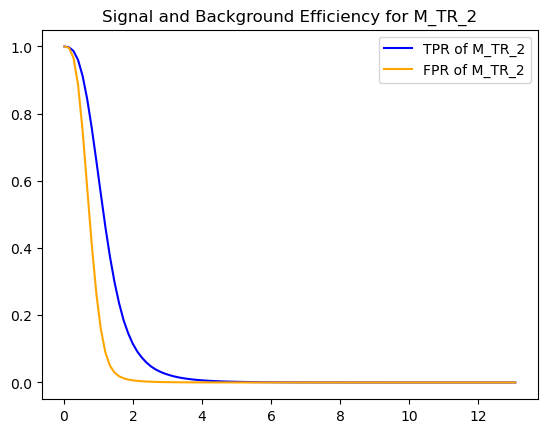

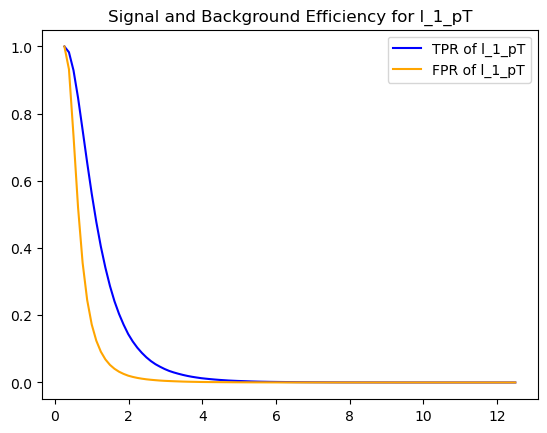

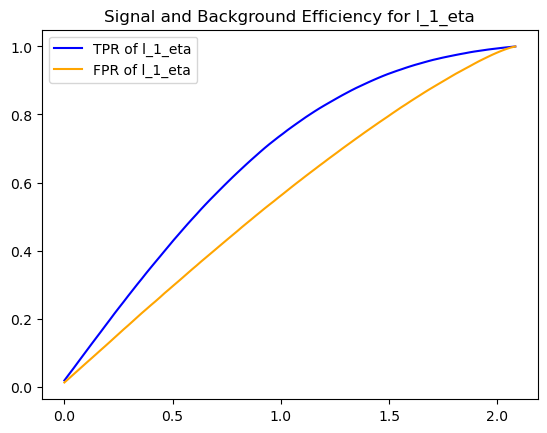

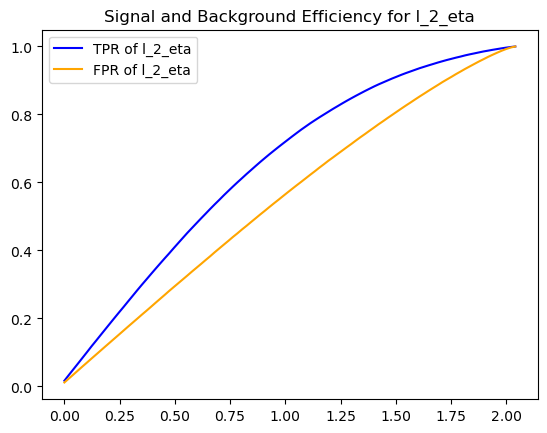

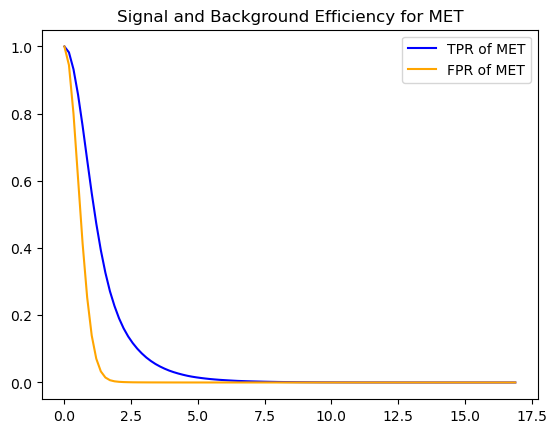

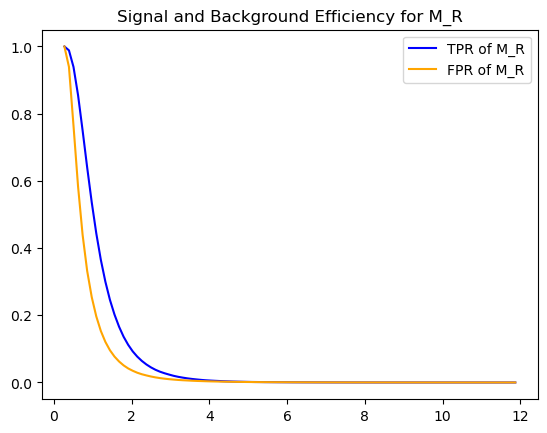

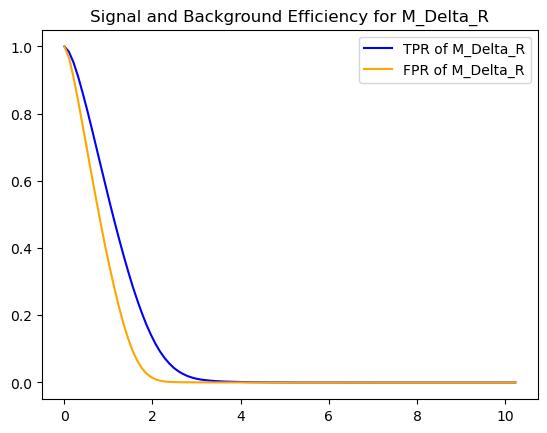

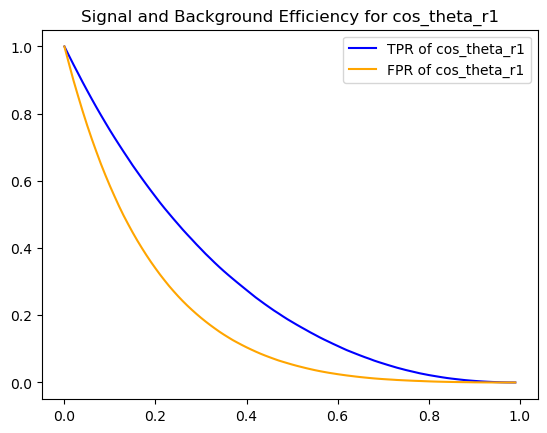

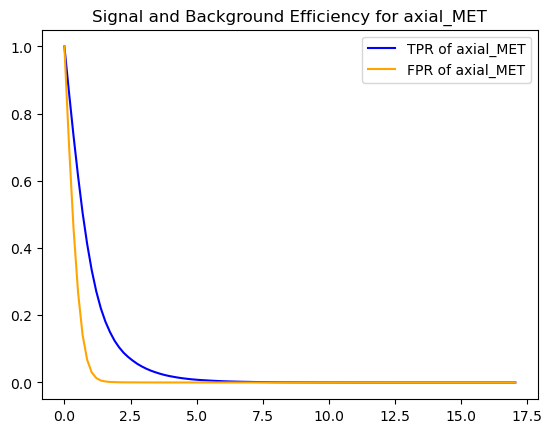

In [178]:
#Usage and graph for each observable

mtr2=plot(df,'M_TR_2',1)
l1pt=plot(df,'l_1_pT',1)
l1eta=plot(df,'l_1_eta',4)
l2eta=plot(df,'l_2_eta',4)
met=plot(df,'MET',1)
mr=plot(df,'M_R',1)
mdr=plot(df,'M_Delta_R',1)
cos=plot(df,'cos_theta_r1',1)
axial=plot(df,'axial_MET',3)

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [23]:
scenarios= {"1": (10,100), 
        "2": (100,1000),
        "3": (1000,10000),
        "4": (10000,100000)}

In [25]:

def plot_significance(df_sig, df_bkg, feature, condition, scenarios,bins=100,log=False):
        
    TPR,bins_sig = compute_rate(df_sig[feature],condition, bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[feature],condition, bins=bins_sig)
    
    max_sigs=dict()
    table=list()
    
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1], sig, label=name + " " + str((n_sig_expected, n_bkg_expected)))
        
        #find max significance for each scenario and store related info in max_sigs
        max_i=np.argmax(sig)
        max_sigs[name]=(max_i, n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i])
        #store results in table
        table.append((name, n_sig_expected, n_bkg_expected, 
                      TPR[max_i], FPR[max_i],
                      n_sig_expected_prime[max_i], n_bkg_expected_prime[max_i], sig[max_i], bins_sig[max_i], max_i))
    if log:
        plt.yscale("log")
    plt.legend()
    plt.xlabel("Threshold x_c")
    plt.ylabel("Significance")
    plt.title(f"{feature}")
    plt.show()
    
    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Scenario",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

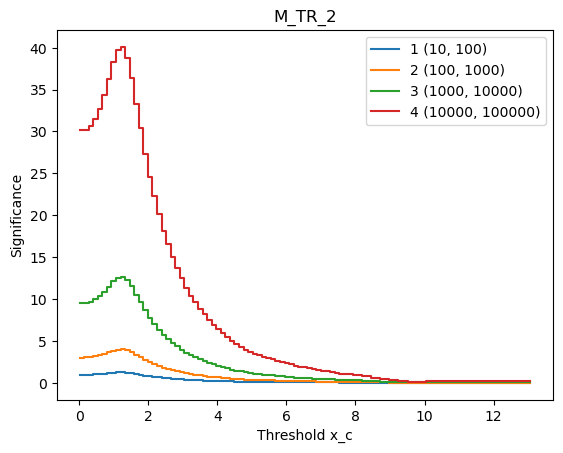

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.374939,0.0498907,3.74939,4.98907,1.26836,1.33219,10
2,100,1000,0.374939,0.0498907,37.4939,49.8907,4.01092,1.33219,10
3,1000,10000,0.374939,0.0498907,374.939,498.907,12.6836,1.33219,10
4,10000,100000,0.374939,0.0498907,3749.39,4989.07,40.1092,1.33219,10


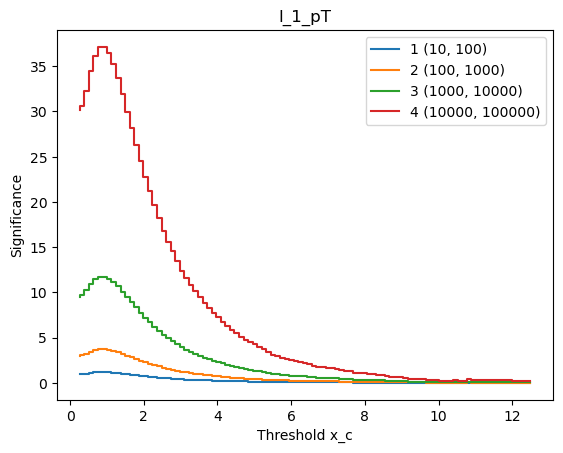

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.561962,0.172665,5.61962,17.2665,1.17468,0.998117,6
2,100,1000,0.561962,0.172665,56.1962,172.665,3.71468,0.998117,6
3,1000,10000,0.561962,0.172665,561.962,1726.65,11.7468,0.998117,6
4,10000,100000,0.561962,0.172665,5619.62,17266.5,37.1468,0.998117,6


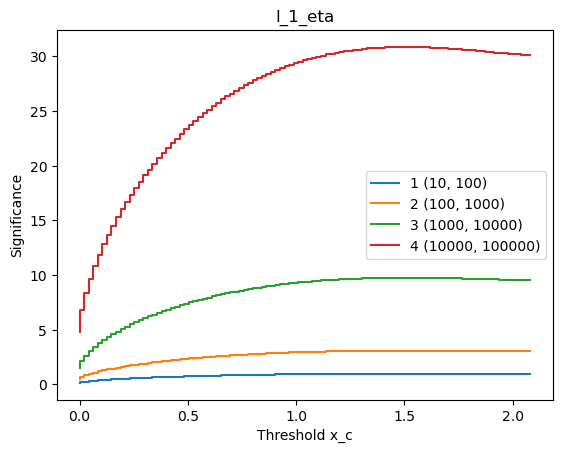

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.918834,0.793986,9.18834,79.3986,0.97623,1.49351,71
2,100,1000,0.918834,0.793986,91.8834,793.986,3.08711,1.49351,71
3,1000,10000,0.918834,0.793986,918.834,7939.86,9.7623,1.49351,71
4,10000,100000,0.918834,0.793986,9188.34,79398.6,30.8711,1.49351,71


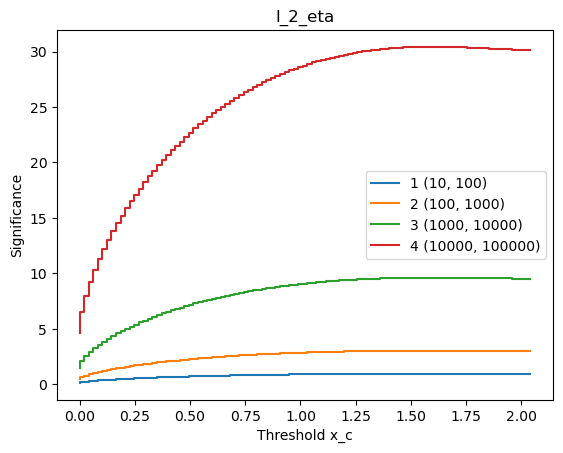

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.936147,0.852967,9.36147,85.2967,0.962199,1.60815,78
2,100,1000,0.936147,0.852967,93.6147,852.967,3.04274,1.60815,78
3,1000,10000,0.936147,0.852967,936.147,8529.67,9.62199,1.60815,78
4,10000,100000,0.936147,0.852967,9361.47,85296.7,30.4274,1.60815,78


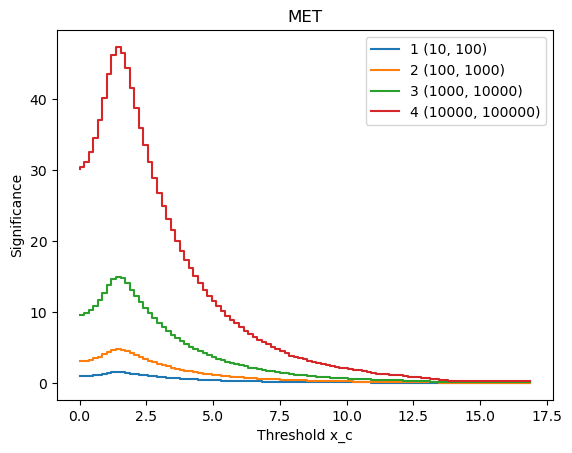

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.32676,0.0148142,3.2676,1.48142,1.49943,1.53595,9
2,100,1000,0.32676,0.0148142,32.676,14.8142,4.74162,1.53595,9
3,1000,10000,0.32676,0.0148142,326.76,148.142,14.9943,1.53595,9
4,10000,100000,0.32676,0.0148142,3267.6,1481.42,47.4162,1.53595,9


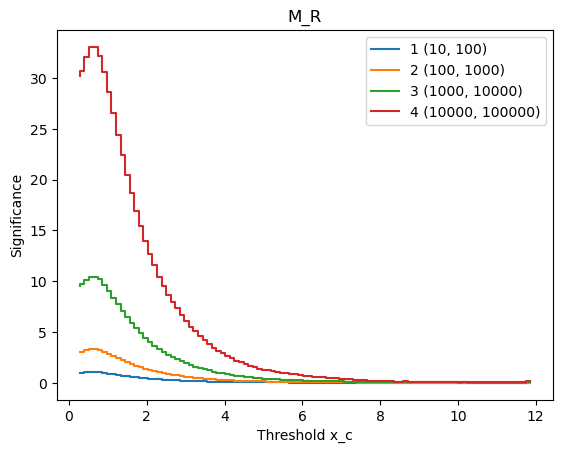

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.749936,0.439256,7.49936,43.9256,1.04577,0.741439,4
2,100,1000,0.749936,0.439256,74.9936,439.256,3.30702,0.741439,4
3,1000,10000,0.749936,0.439256,749.936,4392.56,10.4577,0.741439,4
4,10000,100000,0.749936,0.439256,7499.36,43925.6,33.0702,0.741439,4


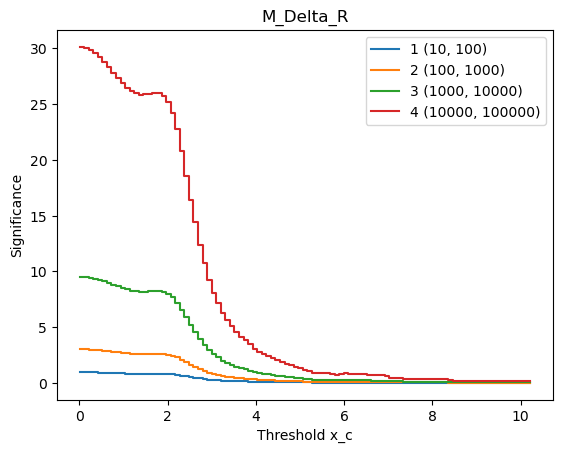

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,0.00445562,0
2,100,1000,1,1,100,1000,3.01511,0.00445562,0
3,1000,10000,1,1,1000,10000,9.53463,0.00445562,0
4,10000,100000,1,1,10000,100000,30.1511,0.00445562,0


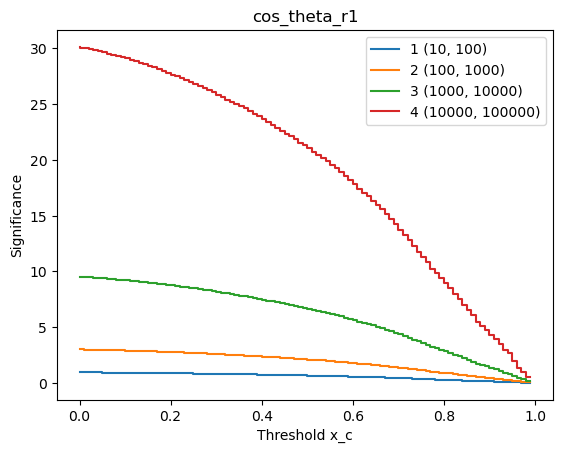

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,1,1,10,100,0.953463,3.52031e-07,0
2,100,1000,1,1,100,1000,3.01511,3.52031e-07,0
3,1000,10000,1,1,1000,10000,9.53463,3.52031e-07,0
4,10000,100000,1,1,10000,100000,30.1511,3.52031e-07,0


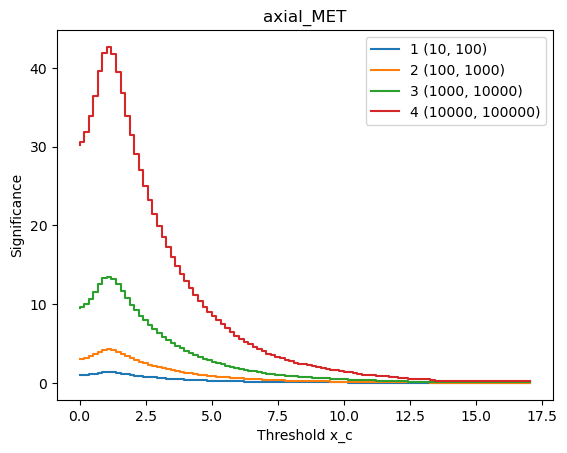

Scenario,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.271116,0.0132411,2.71116,1.32411,1.34964,1.20555,7
2,100,1000,0.271116,0.0132411,27.1116,13.2411,4.26795,1.20555,7
3,1000,10000,0.271116,0.0132411,271.116,132.411,13.4964,1.20555,7
4,10000,100000,0.271116,0.0132411,2711.16,1324.11,42.6795,1.20555,7


In [399]:
_=plot_significance(df_sig, df_bkg,'M_TR_2',1,scenarios)
_=plot_significance(df_sig, df_bkg,'l_1_pT',1,scenarios)
_=plot_significance(df_sig, df_bkg,'l_1_eta',4,scenarios)
_=plot_significance(df_sig, df_bkg,'l_2_eta',4,scenarios)
_=plot_significance(df_sig, df_bkg,'MET',1,scenarios)
_=plot_significance(df_sig, df_bkg,'M_R',1,scenarios)
_=plot_significance(df_sig, df_bkg,'M_Delta_R',1,scenarios)
_=plot_significance(df_sig, df_bkg,'cos_theta_r1',1,scenarios)
_=plot_significance(df_sig, df_bkg,'axial_MET',3,scenarios)

## Exercise 6: Cut Flow

### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

In [102]:
#sub set of features with x_c value and its respective condition 
selected_features = {
   "axial_MET": (1.2, 3),
    "MET": (1.536, 1),         
    "M_TR_2": (1.3, 1),
    "M_Delta_R": (0.00445, 1)
}

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.


In [76]:

def selection(df_sig, df_, feature, condition, x_c):

    if condition==1:
        df_new_sig=df_sig[df_sig[feature] > x_c] #make new subset
        df_bkg_new=df_bkg[df_bkg[feature] > x_c]
    elif condition==2:
        df_new_sig=df_sig[df_sig[feature] < x_c] 
        df_bkg_new=df_bkg[df_bkg[feature] < x_c]
    elif condition==3:
        df_new_sig=df_sig[np.abs(df_sig[feature] - df_sig[feature].mean()) > x_c]
        df_bkg_new=df_bkg[np.abs(df_bkg[feature] - df_bkg[feature].mean()) > x_c]
    elif condition==4:
        df_new_sig=df_sig[np.abs(df_sig[feature] - df_sig[feature].mean()) < x_c]
        df_bkg_new=df_bkg[np.abs(df_bkg[feature] - df_bkg[feature].mean()) < x_c]

    
    eff_s = df_new_sig.shape[0]/df_sig.shape[0] # TPR
    eff_b = df_bkg_new.shape[0]/df_bkg.shape[0] # FPR
    
    #new scenarios based on new subset criteria
    scenarios_new =dict(zip(scenarios.keys(),map(lambda x: (eff_s*x[0],eff_b*x[1]),scenarios.values())))

    return df_new_sig, df_bkg_new, eff_s, eff_b



In [78]:
def cut_flow_analysis(df_sig, df_bkg, selected_features, scenarios):
    cut_flow_table = []

    for scenario_name, (n_sig_expected, n_bkg_expected) in scenarios.items():
        df_sig_cut, df_bkg_cut = df_sig.copy(), df_bkg.copy()
        n_sig_expected_prime, n_bkg_expected_prime = n_sig_expected, n_bkg_expected  # Start with initial signal/background
        
        for feature, (x_c, condition) in selected_features.items():
            #get values from selection function for subset
            df_sig_cut, df_bkg_cut, eff_s, eff_b = selection(df_sig_cut, df_bkg_cut, feature, condition, x_c)

            n_sig_expected_prime *= eff_s  
            n_bkg_expected_prime *= eff_b  

            # Compute significance (avoid division by zero)
            if (n_sig_expected_prime + n_bkg_expected_prime) > 0:
                significance = n_sig_expected_prime / np.sqrt(n_sig_expected_prime + n_bkg_expected_prime)
            else: 
                significance=0 

            cut_flow_table.append([scenario_name, feature, x_c, eff_s, eff_b, n_sig_expected_prime, n_bkg_expected_prime, significance])

    display(HTML(tabulate.tabulate(cut_flow_table, tablefmt='html',
                                   headers=["Scenario",'Feature','x_c',"TPR","FPR","N sig'","N bkg'",'sig'])))

    return cut_flow_table

In [104]:

_= cut_flow_analysis(df_sig, df_bkg, selected_features, scenarios)

Scenario,Feature,x_c,TPR,FPR,N sig',N bkg',sig
1,axial_MET,1.2,0.272935,0.0135178,2.72935,1.35178,1.35104
1,MET,1.536,0.867906,0.0148067,2.36882,0.0200154,1.53264
1,M_TR_2,1.3,0.724459,0.0573397,1.71611,0.00114768,1.30957
1,M_Delta_R,0.00445,1,1,1.71611,0.00114768,1.30957
2,axial_MET,1.2,0.272935,0.0135178,27.2935,13.5178,4.27237
2,MET,1.536,0.867906,0.0148067,23.6882,0.200154,4.84662
2,M_TR_2,1.3,0.724459,0.0573397,17.1611,0.0114768,4.14121
2,M_Delta_R,0.00445,1,1,17.1611,0.0114768,4.14121
3,axial_MET,1.2,0.272935,0.0135178,272.935,135.178,13.5104
3,MET,1.536,0.867906,0.0148067,236.882,2.00154,15.3264


### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [110]:

features_1 = {    "M_Delta_R": (0.004, 1),"M_TR_2": (1.3, 1),
             
}
_= cut_flow_analysis(df_sig, df_bkg, features_1, scenarios)

Scenario,Feature,x_c,TPR,FPR,N sig',N bkg',sig
1,M_Delta_R,0.004,1,1,10,100,0.953463
1,M_TR_2,1.3,0.395599,0.0573397,3.95599,5.73397,1.27085
2,M_Delta_R,0.004,1,1,100,1000,3.01511
2,M_TR_2,1.3,0.395599,0.0573397,39.5599,57.3397,4.01878
3,M_Delta_R,0.004,1,1,1000,10000,9.53463
3,M_TR_2,1.3,0.395599,0.0573397,395.599,573.397,12.7085
4,M_Delta_R,0.004,1,1,10000,100000,30.1511
4,M_TR_2,1.3,0.395599,0.0573397,3955.99,5733.97,40.1878


In [112]:
#Give same values for MTR2 and MDeltaR
features_2 = {  "M_TR_2": (1.3, 1),  "M_Delta_R": (0.004, 1)}

_= cut_flow_analysis(df_sig, df_bkg, features_2, scenarios)

Scenario,Feature,x_c,TPR,FPR,N sig',N bkg',sig
1,M_TR_2,1.3,0.395599,0.0573397,3.95599,5.73397,1.27085
1,M_Delta_R,0.004,1,1,3.95599,5.73397,1.27085
2,M_TR_2,1.3,0.395599,0.0573397,39.5599,57.3397,4.01878
2,M_Delta_R,0.004,1,1,39.5599,57.3397,4.01878
3,M_TR_2,1.3,0.395599,0.0573397,395.599,573.397,12.7085
3,M_Delta_R,0.004,1,1,395.599,573.397,12.7085
4,M_TR_2,1.3,0.395599,0.0573397,3955.99,5733.97,40.1878
4,M_Delta_R,0.004,1,1,3955.99,5733.97,40.1878


In [118]:
#increased MET a little bit
features_3 = { "axial_MET": (1.2, 3), "MET": (1.536, 1)}

_= cut_flow_analysis(df_sig, df_bkg, features_3, scenarios)

Scenario,Feature,x_c,TPR,FPR,N sig',N bkg',sig
1,axial_MET,1.2,0.272935,0.0135178,2.72935,1.35178,1.35104
1,MET,1.536,0.867906,0.0148067,2.36882,0.0200154,1.53264
2,axial_MET,1.2,0.272935,0.0135178,27.2935,13.5178,4.27237
2,MET,1.536,0.867906,0.0148067,23.6882,0.200154,4.84662
3,axial_MET,1.2,0.272935,0.0135178,272.935,135.178,13.5104
3,MET,1.536,0.867906,0.0148067,236.882,2.00154,15.3264
4,axial_MET,1.2,0.272935,0.0135178,2729.35,1351.78,42.7237
4,MET,1.536,0.867906,0.0148067,2368.82,20.0154,48.4662


In [120]:
#increased axial_MET 
features_4 = {"MET": (1.536, 1), "axial_MET": (1.2, 3)} 

_= cut_flow_analysis(df_sig, df_bkg, features_4, scenarios)

Scenario,Feature,x_c,TPR,FPR,N sig',N bkg',sig
1,MET,1.536,0.326742,0.0148067,3.26742,1.48067,1.4995
1,axial_MET,1.2,0.743445,0.0135178,2.42915,0.0200154,1.55219
2,MET,1.536,0.326742,0.0148067,32.6742,14.8067,4.74182
2,axial_MET,1.2,0.743445,0.0135178,24.2915,0.200154,4.90846
3,MET,1.536,0.326742,0.0148067,326.742,148.067,14.995
3,axial_MET,1.2,0.743445,0.0135178,242.915,2.00154,15.5219
4,MET,1.536,0.326742,0.0148067,3267.42,1480.67,47.4182
4,axial_MET,1.2,0.743445,0.0135178,2429.15,20.0154,49.0846


## Exercise 7: ROC Curves



### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

In [128]:
from sklearn.metrics import auc

def AUC(TPR,FPR):
    n = FPR.shape[0]
    return np.sum((FPR[0:n-1]-FPR[1:]) * (TPR[0:n-1]+TPR[1:])/2)

In [130]:
set= {"M_Delta_R": 1, 
    "MET": 1,
    "M_TR_2": 1}


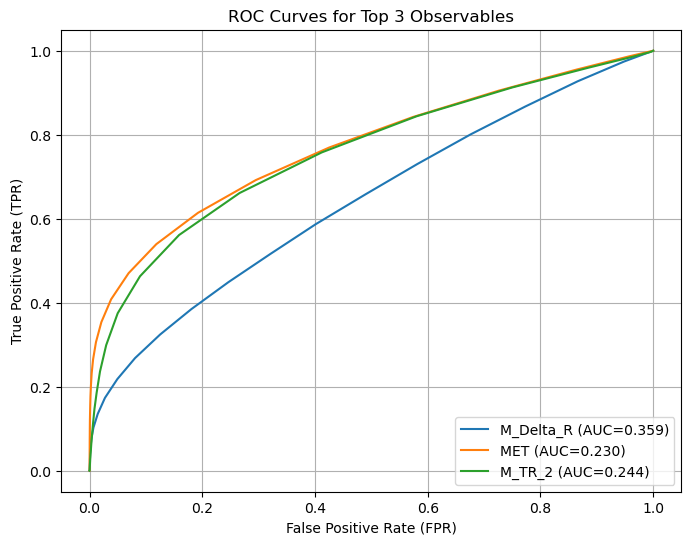

In [596]:
plt.figure(figsize=(8,6))
for feature, condition in set.items():
    
    TPR,bins_sig = compute_rate(df_sig[feature],condition, bins=bins)
    FPR,bins_sig = compute_rate(df_bkg[feature],condition, bins=bins_sig)

    auc= AUC(FPR, TPR)

    plt.plot(FPR, TPR, label=f"{feature} (AUC={auc:.3f})")

# Labeling
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curves for Top 3 Observables")
plt.legend(loc="lower right")
plt.grid()
plt.show()
    

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.


In [ ]:
def plot_roc(df_sig, df_bkg, set,bins=100,log=False):
    
    plt.figure(figsize=(8,6))
    for feature, condition in set.items():
        
        TPR,bins_sig = compute_rate(df_sig[feature],condition, bins=bins)
        FPR,bins_sig = compute_rate(df_bkg[feature],condition, bins=bins_sig)

        auc= AUC(FPR, TPR)

        plt.plot(FPR, TPR, label=f"{feature} (AUC={auc:.3f})")

    # Labeling
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves for Top 3 Observables")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.


In [172]:

def plot_roc_sequentially_all_features(df_sig, df_bkg, selected_features, bins=100):

    plt.figure(figsize=(8, 6))

    # Start with full data
    df_sig_cut, df_bkg_cut = df_sig.copy(), df_bkg.copy()

    legend_labels = []

    for i, (feature, (x_c, condition)) in enumerate(selected_features.items()):
        # Apply the cut 
        df_sig_cut, df_bkg_cut, _, _ = selection(df_sig_cut, df_bkg_cut, feature, condition, x_c)
        
        #calculations
        TPR, bins_sig = compute_rate(df_sig_cut[feature], condition, bins=bins)
        FPR, _ = compute_rate(df_bkg_cut[feature], condition, bins=bins_sig)
        auc = AUC(FPR, TPR)

        label = f" {feature} (AUC={auc:.3f})"
        plt.plot(FPR, TPR, label=label)

        legend_labels.append(label)

    # Labelling
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves After Each Cut with Sequential Feature Selections")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()


### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.

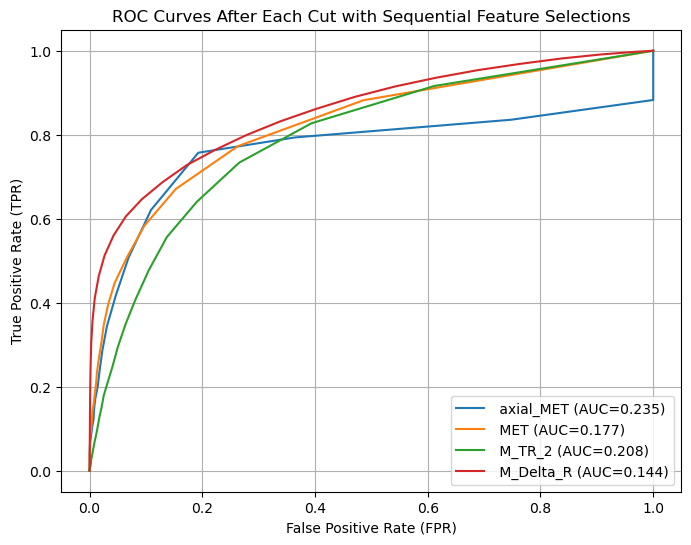

In [174]:
selected_features = {
   "axial_MET": (1.2, 3),
    "MET": (1.536, 1),         
    "M_TR_2": (1.3, 1),
    "M_Delta_R": (0.00445, 1)
}
plot_roc_sequentially_all_features(df_sig, df_bkg, selected_features, bins=100)

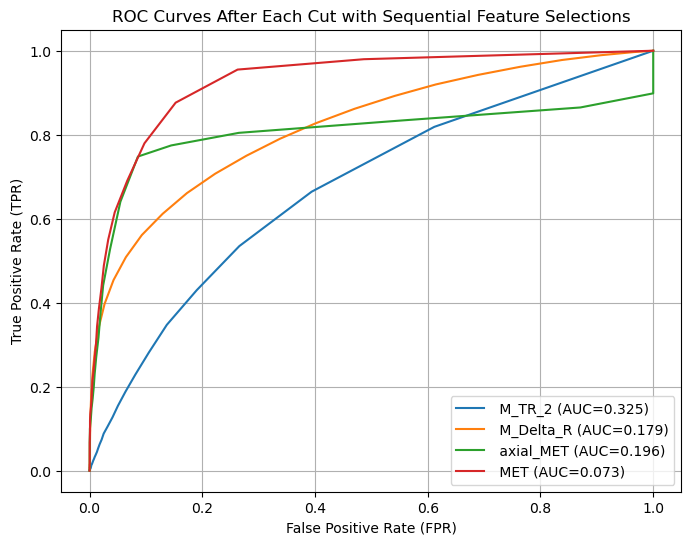

In [176]:
selected_feat = {
    "M_TR_2": (1.3, 1),
    "M_Delta_R": (0.00445, 1),
   "axial_MET": (1.2, 3),
    "MET": (1.536, 1),         
}
plot_roc_sequentially_all_features(df_sig, df_bkg, selected_feat, bins=100)

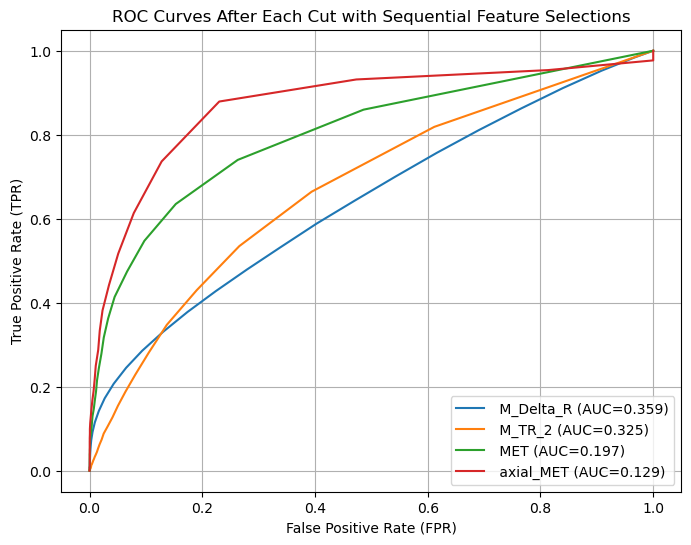

In [180]:
selected_feat_2 = {
    "M_Delta_R": (0.00445, 1),
    "M_TR_2": (1.3, 1),
    "MET": (1.536, 1), 
     "axial_MET": (1.2, 3)
}
plot_roc_sequentially_all_features(df_sig, df_bkg, selected_feat_2, bins=100)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$. 

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [604]:
#cleaning
df_sig_0 = df_sig.drop("signal",axis=1)
df_bkg_0 = df_bkg.drop("signal",axis=1)

#mean
m_s= np.mean(df_sig_0,axis=0)
m_b= np.mean(df_bkg_0,axis=0)

#make delta (in matrix)
delta = m_s-m_b
delta=np.matrix(m_s-m_b).transpose()

In [606]:
# For Sb
S_B= delta*delta.transpose()
S_B

matrix([[ 2.87970231e-01,  4.58922304e-04,  4.67467434e-04,
          1.38148662e-01,  1.54068049e-03,  3.66095560e-04,
          4.13461344e-01, -6.36618070e-04,  2.71136238e-01,
          8.54657090e-02,  1.82331687e-01,  2.66557653e-01,
          5.53227373e-02,  7.37824064e-02,  1.74241790e-01,
          1.84116478e-01,  1.54056891e-02,  5.66281031e-02],
        [ 4.58922304e-04,  7.31359210e-07,  7.44977113e-07,
          2.20159917e-04,  2.45529768e-06,  5.83426339e-07,
          6.58910580e-04, -1.01454317e-06,  4.32094896e-04,
          1.36201995e-04,  2.90571971e-04,  4.24798257e-04,
          8.81648006e-05,  1.17582959e-04,  2.77679548e-04,
          2.93416294e-04,  2.45511986e-05,  9.02450903e-05],
        [ 4.67467434e-04,  7.44977113e-07,  7.58848582e-07,
          2.24259293e-04,  2.50101531e-06,  5.94289733e-07,
          6.71179491e-04, -1.03343396e-06,  4.40140500e-04,
          1.38738075e-04,  2.95982420e-04,  4.32707998e-04,
          8.98064286e-05,  1.19772353e

In [634]:
#For Sw
delta_s=np.matrix(df_sig_0-m_s).transpose()
S_W_s= delta_s*delta_s.transpose()
delta_b=np.matrix(df_bkg_0-m_b).transpose()
S_W_b= delta_b*delta_b.transpose()
S_W=S_W_s + S_W_b
S_W

matrix([[ 1.97992314e+05, -2.55306615e+02, -1.97200507e+01,
          1.35369127e+05, -3.65670849e+02,  3.23221047e+02,
          6.28904849e+04, -3.89327463e+02,  1.51034849e+04,
         -1.54758396e+04,  1.59581488e+05,  1.10521398e+05,
         -3.67188498e+04, -1.53586322e+04,  1.49663062e+05,
          2.60134287e+04, -2.53869596e+04,  4.05187559e+03],
        [-2.55306615e+02,  5.02149623e+05, -4.28906989e+02,
         -1.08782977e+02,  2.04155734e+05, -5.21076631e+02,
         -1.15528299e+03, -2.94357629e+02, -7.38924286e+02,
         -5.71353000e+02, -3.12983919e+02, -3.87193278e+02,
          1.39704991e+02,  1.98964347e+02, -3.36474893e+02,
         -5.30158934e+02, -3.73212146e+02,  1.49612912e+02],
        [-1.97200507e+01, -4.28906989e+02,  5.01985584e+05,
          6.28639491e+02,  1.25046741e+02, -1.33404896e+05,
          2.99862992e+02, -9.24016755e+04,  2.98463939e+02,
         -9.53566382e+02,  4.94789240e+02,  3.80674792e+02,
          8.96491437e+01,  5.15276528e

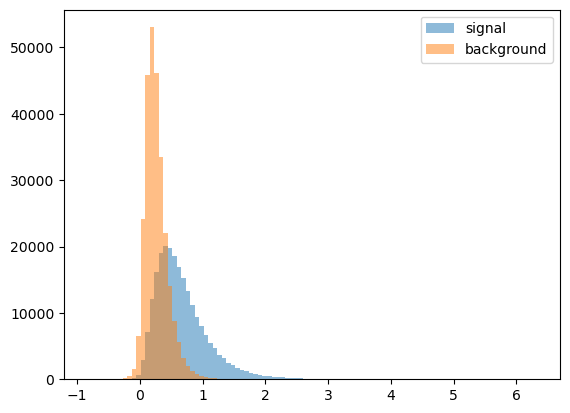

In [615]:
#2 for W

S_W_inv = np.linalg.inv(S_W)
w = S_W_inv * np.matrix(m_b - m_s).transpose()
w_1=w/sum(w)
output_s=np.matrix(df_sig_0)*w_1
output_b=np.matrix(df_bkg_0)*w_1
h_s,bins,_=plt.hist(output_s,label="signal",alpha=0.5,bins=100)
h_b,bins,_=plt.hist(output_b,bins=bins,alpha=0.5,label="background")
plt.legend()

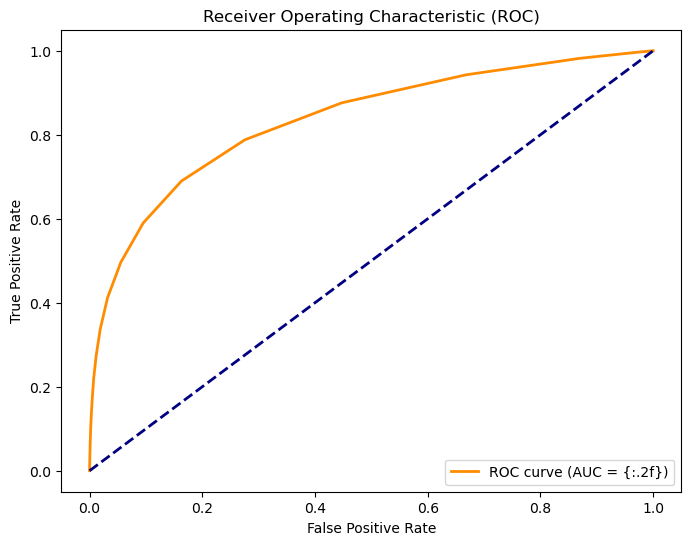

In [628]:
#3 ROC Curve

thresholds = np.linspace(min(np.min(output_s), np.min(output_b)),
                         max(np.max(output_s), np.max(output_b)), 100)

#store TPR, FPR, and significance for each threshold
tpr_list = []
fpr_list = []
significance_list = []
auc_list=[]

for threshold in thresholds:

    signal_pred = output_s > threshold
    background_pred = output_b > threshold
    
    TPR = np.sum(signal_pred) / len(output_s)
    FPR = np.sum(background_pred) / len(output_b)
    
    N_s_prime = np.sum(signal_pred)
    N_b_prime = np.sum(background_pred)

    significance = N_s_prime / np.sqrt(N_s_prime + N_b_prime) if (N_s_prime + N_b_prime) > 0 else 0
    
    tpr_list.append(TPR)
    fpr_list.append(FPR)
    significance_list.append(significance)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [630]:
#4 Max Significance 

max_significance = max(significance_list)
max_significance_threshold = thresholds[np.argmax(significance_list)]

print(f"Maximal Significance: {max_significance}")
print(f"Threshold corresponding to maximal significance: {max_significance_threshold}")

Maximal Significance: 357.53038922559057
Threshold corresponding to maximal significance: 0.3369478279473972
